In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("mnist_train.csv")
data.shape

(60000, 785)

In [24]:
# First 5k rows due to processing speed.
data = data.iloc[0:5000,:]
data.shape

(5000, 785)

In [25]:
# Target
y = data.pop("label")

# Size (10k)
m = y.size

X = data

# Add intercept (x_0)
X = np.hstack((np.ones((m,1)),X))

# Check shapes
print("y shape:", y.shape)
print("X + intercept shape:", X.shape)

y shape: (5000,)
X + intercept shape: (5000, 785)


/home/fabs/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


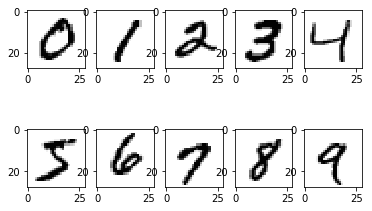

In [26]:
# Visualizing characters 
data = np.array(data)
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(y == i)[0]
    plottable_image = np.reshape(data[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')

In [27]:
# Splitting & Shuffling test/train data.

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
# Functions

def get_hypothesis(X, theta):
    z = np.dot(X,theta)
    return 1.0/(1+np.exp(-z))

def cross_entropy(hypothesis, y):
    return (-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)).mean()

def gradient_descent(X,y,theta, learning_rate, iterations):
    # Stores last iteration cost
    temp_cost =[]
    for i in range(1, iterations):
        hypothesis = get_hypothesis(X, theta)
        loss = hypothesis - y.ravel()
        gradient = (1/m) * np.dot(X.T, loss)
        # Updating coefficients 
        theta = theta - learning_rate * gradient
        cost = cross_entropy(hypothesis, y)
        # temp_cost index
        if i%1000 ==0:
            print("Iteration:",i,"Cost:", cost)
        b = i-1
        temp_cost.append(cost)
        if temp_cost[b]<cost:break
        # Print Cost every 1000th iteration
    return theta
    

In [29]:
# Coding targets per classifier

zero_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [1,0,0,0,0,0,0,0,0,0]))
one_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,1,0,0,0,0,0,0,0,0]))
two_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,1,0,0,0,0,0,0,0]))
three_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,1,0,0,0,0,0,0]))
four_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,1,0,0,0,0,0]))
five_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,1,0,0,0,0]))
six_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,1,0,0,0]))
seven_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,0,1,0,0]))
eight_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,0,0,1,0]))
nine_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,0,0,0,1]))

In [34]:
# Listing targets
targets = [zero_target,one_target,two_target,three_target,four_target,five_target,six_target,seven_target, eight_target, nine_target]

# Initiating theta (coefficients)
initial_theta = np.zeros(xTrain.shape[1])

learning_rate = 0.00001
iterations = 2000

theta_matrix = []
for target in targets:
    theta_matrix.append(gradient_descent(xTrain, target, initial_theta, learning_rate, iterations))
    

iteration: 1 cost: 0.6931471805599454
iteration: 2 cost: 0.7029190112642789
iteration: 3 cost: 0.35891917011894064
iteration: 4 cost: 0.14228567631729042
iteration: 5 cost: 0.1263510366442309
iteration: 6 cost: 0.11713667260092582
iteration: 7 cost: 0.11032557217736987
iteration: 8 cost: 0.10484515943326178
iteration: 9 cost: 0.10026042998326057
iteration: 10 cost: 0.09634434515625442
iteration: 11 cost: 0.09294588932645692
iteration: 12 cost: 0.08995805053568932
iteration: 13 cost: 0.08730249731597299
iteration: 14 cost: 0.08492043550097464
iteration: 15 cost: 0.08276677249600278
iteration: 16 cost: 0.0808062711606992
iteration: 17 cost: 0.07901094131733413
iteration: 18 cost: 0.07735822602922723
iteration: 19 cost: 0.07582971244572337
iteration: 20 cost: 0.07441019739538723
iteration: 21 cost: 0.07308699814358087
iteration: 22 cost: 0.0718494359107684
iteration: 23 cost: 0.0706884432869304
iteration: 24 cost: 0.06959626192464177
iteration: 25 cost: 0.06856620697610995
iteration: 26 c

iteration: 239 cost: 0.03150331323039138
iteration: 240 cost: 0.03146053840546246
iteration: 241 cost: 0.03141800969095688
iteration: 242 cost: 0.03137572466129127
iteration: 243 cost: 0.031333680924126535
iteration: 244 cost: 0.031291876119777955
iteration: 245 cost: 0.031250307920638334
iteration: 246 cost: 0.03120897403061367
iteration: 247 cost: 0.031167872184571167
iteration: 248 cost: 0.03112700014779919
iteration: 249 cost: 0.031086355715478853
iteration: 250 cost: 0.031045936712166985
iteration: 251 cost: 0.031005740991290137
iteration: 252 cost: 0.0309657664346494
iteration: 253 cost: 0.030926010951935666
iteration: 254 cost: 0.030886472480255195
iteration: 255 cost: 0.030847148983665095
iteration: 256 cost: 0.03080803845271858
iteration: 257 cost: 0.030769138904019694
iteration: 258 cost: 0.030730448379787247
iteration: 259 cost: 0.03069196494742785
iteration: 260 cost: 0.030653686699117638
iteration: 261 cost: 0.030615611751392692
iteration: 262 cost: 0.0305777382447477
iter

iteration: 461 cost: 0.025537308748526614
iteration: 462 cost: 0.025519858638027016
iteration: 463 cost: 0.02550245848428455
iteration: 464 cost: 0.02548510801984585
iteration: 465 cost: 0.02546780697924326
iteration: 466 cost: 0.025450555098976188
iteration: 467 cost: 0.02543335211749271
iteration: 468 cost: 0.025416197775171356
iteration: 469 cost: 0.025399091814303127
iteration: 470 cost: 0.02538203397907371
iteration: 471 cost: 0.025365024015545884
iteration: 472 cost: 0.02534806167164211
iteration: 473 cost: 0.025331146697127365
iteration: 474 cost: 0.025314278843592122
iteration: 475 cost: 0.02529745786443552
iteration: 476 cost: 0.02528068351484875
iteration: 477 cost: 0.025263955551798632
iteration: 478 cost: 0.025247273734011304
iteration: 479 cost: 0.025230637821956194
iteration: 480 cost: 0.025214047577830082
iteration: 481 cost: 0.02519750276554139
iteration: 482 cost: 0.02518100315069461
iteration: 483 cost: 0.02516454850057495
iteration: 484 cost: 0.025148138584133086
ite

iteration: 662 cost: 0.0227730882216216
iteration: 663 cost: 0.022762104035916678
iteration: 664 cost: 0.022751140215359705
iteration: 665 cost: 0.022740196684246712
iteration: 666 cost: 0.022729273367275787
iteration: 667 cost: 0.022718370189544344
iteration: 668 cost: 0.022707487076546448
iteration: 669 cost: 0.022696623954170176
iteration: 670 cost: 0.0226857807486949
iteration: 671 cost: 0.02267495738678874
iteration: 672 cost: 0.022664153795505917
iteration: 673 cost: 0.022653369902284188
iteration: 674 cost: 0.02264260563494228
iteration: 675 cost: 0.022631860921677335
iteration: 676 cost: 0.02262113569106242
iteration: 677 cost: 0.022610429872044015
iteration: 678 cost: 0.022599743393939525
iteration: 679 cost: 0.022589076186434815
iteration: 680 cost: 0.022578428179581802
iteration: 681 cost: 0.02256779930379599
iteration: 682 cost: 0.022557189489854104
iteration: 683 cost: 0.02254659866889169
iteration: 684 cost: 0.022536026772400766
iteration: 685 cost: 0.022525473732227446
i

iteration: 874 cost: 0.020807088207439536
iteration: 875 cost: 0.020799192288005686
iteration: 876 cost: 0.020791306717835703
iteration: 877 cost: 0.02078343146860712
iteration: 878 cost: 0.020775566512111886
iteration: 879 cost: 0.020767711820255746
iteration: 880 cost: 0.02075986736505766
iteration: 881 cost: 0.020752033118649225
iteration: 882 cost: 0.020744209053274072
iteration: 883 cost: 0.020736395141287303
iteration: 884 cost: 0.020728591355154903
iteration: 885 cost: 0.020720797667453168
iteration: 886 cost: 0.020713014050868152
iteration: 887 cost: 0.020705240478195077
iteration: 888 cost: 0.020697476922337785
iteration: 889 cost: 0.020689723356308174
iteration: 890 cost: 0.020681979753225645
iteration: 891 cost: 0.020674246086316562
iteration: 892 cost: 0.02066652232891368
iteration: 893 cost: 0.02065880845445561
iteration: 894 cost: 0.02065110443648629
iteration: 895 cost: 0.020643410248654435
iteration: 896 cost: 0.02063572586471299
iteration: 897 cost: 0.02062805125851862

iteration: 1094 cost: 0.019278592670884685
iteration: 1095 cost: 0.01927244720112883
iteration: 1096 cost: 0.019266307832937972
iteration: 1097 cost: 0.019260174553469
iteration: 1098 cost: 0.01925404734991976
iteration: 1099 cost: 0.019247926209528914
iteration: 1100 cost: 0.019241811119575736
iteration: 1101 cost: 0.01923570206737997
iteration: 1102 cost: 0.019229599040301637
iteration: 1103 cost: 0.019223502025740895
iteration: 1104 cost: 0.01921741101113784
iteration: 1105 cost: 0.019211325983972374
iteration: 1106 cost: 0.019205246931763998
iteration: 1107 cost: 0.019199173842071704
iteration: 1108 cost: 0.019193106702493763
iteration: 1109 cost: 0.01918704550066757
iteration: 1110 cost: 0.01918099022426951
iteration: 1111 cost: 0.01917494086101477
iteration: 1112 cost: 0.019168897398657195
iteration: 1113 cost: 0.019162859824989106
iteration: 1114 cost: 0.019156828127841165
iteration: 1115 cost: 0.019150802295082217
iteration: 1116 cost: 0.019144782314619115
iteration: 1117 cost:

iteration: 1313 cost: 0.018059448735302436
iteration: 1314 cost: 0.018054390592479336
iteration: 1315 cost: 0.01804933648557824
iteration: 1316 cost: 0.018044286407774494
iteration: 1317 cost: 0.0180392403522612
iteration: 1318 cost: 0.018034198312249217
iteration: 1319 cost: 0.018029160280967068
iteration: 1320 cost: 0.018024126251660874
iteration: 1321 cost: 0.018019096217594302
iteration: 1322 cost: 0.01801407017204851
iteration: 1323 cost: 0.018009048108322084
iteration: 1324 cost: 0.018004030019730975
iteration: 1325 cost: 0.017999015899608423
iteration: 1326 cost: 0.017994005741304938
iteration: 1327 cost: 0.0179889995381882
iteration: 1328 cost: 0.017983997283643024
iteration: 1329 cost: 0.017978998971071303
iteration: 1330 cost: 0.017974004593891917
iteration: 1331 cost: 0.017969014145540724
iteration: 1332 cost: 0.017964027619470455
iteration: 1333 cost: 0.017959045009150697
iteration: 1334 cost: 0.0179540663080678
iteration: 1335 cost: 0.01794909150972485
iteration: 1336 cost

iteration: 1542 cost: 0.016994733582279684
iteration: 1543 cost: 0.01699045088475799
iteration: 1544 cost: 0.016986171027046217
iteration: 1545 cost: 0.01698189400518938
iteration: 1546 cost: 0.01697761981524112
iteration: 1547 cost: 0.016973348453263624
iteration: 1548 cost: 0.016969079915327666
iteration: 1549 cost: 0.01696481419751252
iteration: 1550 cost: 0.01696055129590599
iteration: 1551 cost: 0.016956291206604336
iteration: 1552 cost: 0.016952033925712297
iteration: 1553 cost: 0.016947779449343024
iteration: 1554 cost: 0.01694352777361808
iteration: 1555 cost: 0.016939278894667408
iteration: 1556 cost: 0.01693503280862932
iteration: 1557 cost: 0.016930789511650442
iteration: 1558 cost: 0.016926548999885733
iteration: 1559 cost: 0.016922311269498422
iteration: 1560 cost: 0.016918076316660008
iteration: 1561 cost: 0.01691384413755023
iteration: 1562 cost: 0.01690961472835702
iteration: 1563 cost: 0.016905388085276547
iteration: 1564 cost: 0.016901164204513094
iteration: 1565 cost

iteration: 1746 cost: 0.01617489072679855
iteration: 1747 cost: 0.016171115928982748
iteration: 1748 cost: 0.016167343312951388
iteration: 1749 cost: 0.01616357287609187
iteration: 1750 cost: 0.01615980461579656
iteration: 1751 cost: 0.01615603852946277
iteration: 1752 cost: 0.016152274614492746
iteration: 1753 cost: 0.016148512868293642
iteration: 1754 cost: 0.016144753288277542
iteration: 1755 cost: 0.016140995871861425
iteration: 1756 cost: 0.016137240616467145
iteration: 1757 cost: 0.016133487519521428
iteration: 1758 cost: 0.016129736578455872
iteration: 1759 cost: 0.016125987790706914
iteration: 1760 cost: 0.01612224115371584
iteration: 1761 cost: 0.016118496664928747
iteration: 1762 cost: 0.01611475432179655
iteration: 1763 cost: 0.01611101412177496
iteration: 1764 cost: 0.01610727606232449
iteration: 1765 cost: 0.01610354014091042
iteration: 1766 cost: 0.016099806355002785
iteration: 1767 cost: 0.016096074702076392
iteration: 1768 cost: 0.01609234517961078
iteration: 1769 cost:

iteration: 1958 cost: 0.015419708557769432
iteration: 1959 cost: 0.015416344730080413
iteration: 1960 cost: 0.015412982624528407
iteration: 1961 cost: 0.015409622239325297
iteration: 1962 cost: 0.015406263572685975
iteration: 1963 cost: 0.015402906622828337
iteration: 1964 cost: 0.015399551387973286
iteration: 1965 cost: 0.015396197866344712
iteration: 1966 cost: 0.0153928460561695
iteration: 1967 cost: 0.015389495955677504
iteration: 1968 cost: 0.01538614756310156
iteration: 1969 cost: 0.015382800876677472
iteration: 1970 cost: 0.015379455894643998
iteration: 1971 cost: 0.015376112615242857
iteration: 1972 cost: 0.01537277103671871
iteration: 1973 cost: 0.015369431157319162
iteration: 1974 cost: 0.015366092975294758
iteration: 1975 cost: 0.01536275648889896
iteration: 1976 cost: 0.015359421696388159
iteration: 1977 cost: 0.015356088596021663
iteration: 1978 cost: 0.015352757186061699
iteration: 1979 cost: 0.015349427464773363
iteration: 1980 cost: 0.01534609943042469
iteration: 1981 c

iteration: 199 cost: 0.03561221106186486
iteration: 200 cost: 0.03557177072715028
iteration: 201 cost: 0.03553159246763222
iteration: 202 cost: 0.03549167303489361
iteration: 203 cost: 0.03545200923751654
iteration: 204 cost: 0.035412597939803475
iteration: 205 cost: 0.03537343606053321
iteration: 206 cost: 0.035334520571750475
iteration: 207 cost: 0.035295848497588087
iteration: 208 cost: 0.035257416913120704
iteration: 209 cost: 0.03521922294324902
iteration: 210 cost: 0.03518126376161368
iteration: 211 cost: 0.03514353658953775
iteration: 212 cost: 0.035106038694997135
iteration: 213 cost: 0.035068767391617794
iteration: 214 cost: 0.035031720037699124
iteration: 215 cost: 0.03499489403526266
iteration: 216 cost: 0.03495828682912537
iteration: 217 cost: 0.03492189590599664
iteration: 218 cost: 0.03488571879359847
iteration: 219 cost: 0.03484975305980799
iteration: 220 cost: 0.034813996311821756
iteration: 221 cost: 0.034778446195341095
iteration: 222 cost: 0.03474310039377795
iterati

iteration: 409 cost: 0.03026495367109519
iteration: 410 cost: 0.03024791384838534
iteration: 411 cost: 0.030230919673001316
iteration: 412 cost: 0.03021397088361697
iteration: 413 cost: 0.030197067221097135
iteration: 414 cost: 0.03018020842847379
iteration: 415 cost: 0.030163394250922477
iteration: 416 cost: 0.030146624435739077
iteration: 417 cost: 0.030129898732316935
iteration: 418 cost: 0.03011321689212415
iteration: 419 cost: 0.030096578668681317
iteration: 420 cost: 0.03007998381753948
iteration: 421 cost: 0.03006343209625841
iteration: 422 cost: 0.030046923264385135
iteration: 423 cost: 0.030030457083432778
iteration: 424 cost: 0.030014033316859676
iteration: 425 cost: 0.029997651730048765
iteration: 426 cost: 0.029981312090287204
iteration: 427 cost: 0.029965014166746316
iteration: 428 cost: 0.029948757730461736
iteration: 429 cost: 0.0299325425543139
iteration: 430 cost: 0.029916368413008664
iteration: 431 cost: 0.029900235083058255
iteration: 432 cost: 0.02988414234276248
it

iteration: 614 cost: 0.02746561700010641
iteration: 615 cost: 0.027454464447626285
iteration: 616 cost: 0.027443329854508675
iteration: 617 cost: 0.02743221315568563
iteration: 618 cost: 0.027421114286448306
iteration: 619 cost: 0.027410033182444397
iteration: 620 cost: 0.027398969779675583
iteration: 621 cost: 0.027387924014494986
iteration: 622 cost: 0.027376895823604655
iteration: 623 cost: 0.027365885144053113
iteration: 624 cost: 0.02735489191323285
iteration: 625 cost: 0.02734391606887791
iteration: 626 cost: 0.02733295754906146
iteration: 627 cost: 0.02732201629219339
iteration: 628 cost: 0.027311092237017907
iteration: 629 cost: 0.027300185322611224
iteration: 630 cost: 0.027289295488379196
iteration: 631 cost: 0.02727842267405498
iteration: 632 cost: 0.02726756681969678
iteration: 633 cost: 0.027256727865685518
iteration: 634 cost: 0.027245905752722635
iteration: 635 cost: 0.02723510042182778
iteration: 636 cost: 0.027224311814336655
iteration: 637 cost: 0.027213539871898767
i

iteration: 812 cost: 0.025542228523893512
iteration: 813 cost: 0.025533701322058035
iteration: 814 cost: 0.025525183915670695
iteration: 815 cost: 0.02551667627946239
iteration: 816 cost: 0.02550817838826825
iteration: 817 cost: 0.02549969021702708
iteration: 818 cost: 0.025491211740780763
iteration: 819 cost: 0.02548274293467375
iteration: 820 cost: 0.025474283773952458
iteration: 821 cost: 0.025465834233964757
iteration: 822 cost: 0.025457394290159373
iteration: 823 cost: 0.025448963918085384
iteration: 824 cost: 0.025440543093391655
iteration: 825 cost: 0.025432131791826317
iteration: 826 cost: 0.0254237299892362
iteration: 827 cost: 0.025415337661566346
iteration: 828 cost: 0.02540695478485945
iteration: 829 cost: 0.025398581335255323
iteration: 830 cost: 0.025390217288990408
iteration: 831 cost: 0.025381862622397236
iteration: 832 cost: 0.02537351731190393
iteration: 833 cost: 0.025365181334033676
iteration: 834 cost: 0.025356854665404202
iteration: 835 cost: 0.02534853728272733
i

iteration: 1046 cost: 0.023770774472859392
iteration: 1047 cost: 0.02376401732830816
iteration: 1048 cost: 0.0237572660456799
iteration: 1049 cost: 0.023750520614021584
iteration: 1050 cost: 0.023743781022413837
iteration: 1051 cost: 0.02373704725997073
iteration: 1052 cost: 0.023730319315839694
iteration: 1053 cost: 0.023723597179201347
iteration: 1054 cost: 0.023716880839269372
iteration: 1055 cost: 0.023710170285290346
iteration: 1056 cost: 0.02370346550654363
iteration: 1057 cost: 0.02369676649234121
iteration: 1058 cost: 0.023690073232027594
iteration: 1059 cost: 0.023683385714979594
iteration: 1060 cost: 0.023676703930606297
iteration: 1061 cost: 0.02367002786834884
iteration: 1062 cost: 0.02366335751768031
iteration: 1063 cost: 0.023656692868105608
iteration: 1064 cost: 0.023650033909161323
iteration: 1065 cost: 0.023643380630415566
iteration: 1066 cost: 0.023636733021467876
iteration: 1067 cost: 0.02363009107194906
iteration: 1068 cost: 0.02362345477152108
iteration: 1069 cost:

iteration: 1283 cost: 0.02231286602315866
iteration: 1284 cost: 0.022307250703487838
iteration: 1285 cost: 0.022301639350095766
iteration: 1286 cost: 0.022296031957184978
iteration: 1287 cost: 0.022290428518971585
iteration: 1288 cost: 0.0222848290296852
iteration: 1289 cost: 0.022279233483568913
iteration: 1290 cost: 0.022273641874879225
iteration: 1291 cost: 0.022268054197886012
iteration: 1292 cost: 0.02226247044687249
iteration: 1293 cost: 0.022256890616135148
iteration: 1294 cost: 0.022251314699983725
iteration: 1295 cost: 0.022245742692741138
iteration: 1296 cost: 0.022240174588743493
iteration: 1297 cost: 0.022234610382339967
iteration: 1298 cost: 0.022229050067892813
iteration: 1299 cost: 0.022223493639777315
iteration: 1300 cost: 0.022217941092381694
iteration: 1301 cost: 0.022212392420107165
iteration: 1302 cost: 0.022206847617367784
iteration: 1303 cost: 0.022201306678590473
iteration: 1304 cost: 0.02219576959821495
iteration: 1305 cost: 0.02219023637069371
iteration: 1306 c

iteration: 1480 cost: 0.02127667651199831
iteration: 1481 cost: 0.021271745251485685
iteration: 1482 cost: 0.021266817029564677
iteration: 1483 cost: 0.02126189184242518
iteration: 1484 cost: 0.021256969686264456
iteration: 1485 cost: 0.02125205055728719
iteration: 1486 cost: 0.02124713445170543
iteration: 1487 cost: 0.021242221365738587
iteration: 1488 cost: 0.02123731129561339
iteration: 1489 cost: 0.021232404237563892
iteration: 1490 cost: 0.021227500187831424
iteration: 1491 cost: 0.021222599142664608
iteration: 1492 cost: 0.021217701098319303
iteration: 1493 cost: 0.021212806051058616
iteration: 1494 cost: 0.02120791399715286
iteration: 1495 cost: 0.021203024932879528
iteration: 1496 cost: 0.021198138854523315
iteration: 1497 cost: 0.021193255758376047
iteration: 1498 cost: 0.021188375640736695
iteration: 1499 cost: 0.02118349849791135
iteration: 1500 cost: 0.021178624326213185
iteration: 1501 cost: 0.021173753121962468
iteration: 1502 cost: 0.021168884881486508
iteration: 1503 co

iteration: 1699 cost: 0.02026330505189146
iteration: 1700 cost: 0.020258959457197138
iteration: 1701 cost: 0.020254616214442328
iteration: 1702 cost: 0.02025027532106001
iteration: 1703 cost: 0.020245936774487452
iteration: 1704 cost: 0.02024160057216625
iteration: 1705 cost: 0.02023726671154227
iteration: 1706 cost: 0.020232935190065672
iteration: 1707 cost: 0.020228606005190896
iteration: 1708 cost: 0.020224279154376638
iteration: 1709 cost: 0.020219954635085847
iteration: 1710 cost: 0.020215632444785726
iteration: 1711 cost: 0.02021131258094771
iteration: 1712 cost: 0.02020699504104745
iteration: 1713 cost: 0.020202679822564833
iteration: 1714 cost: 0.020198366922983928
iteration: 1715 cost: 0.020194056339793046
iteration: 1716 cost: 0.020189748070484643
iteration: 1717 cost: 0.020185442112555383
iteration: 1718 cost: 0.020181138463506075
iteration: 1719 cost: 0.020176837120841725
iteration: 1720 cost: 0.020172538082071454
iteration: 1721 cost: 0.02016824134470856
iteration: 1722 co

iteration: 1935 cost: 0.019297904626701015
iteration: 1936 cost: 0.01929405117135185
iteration: 1937 cost: 0.019290199564041464
iteration: 1938 cost: 0.019286349803005542
iteration: 1939 cost: 0.019282501886482444
iteration: 1940 cost: 0.019278655812713163
iteration: 1941 cost: 0.01927481157994135
iteration: 1942 cost: 0.019270969186413314
iteration: 1943 cost: 0.01926712863037799
iteration: 1944 cost: 0.01926328991008697
iteration: 1945 cost: 0.019259453023794455
iteration: 1946 cost: 0.01925561796975728
iteration: 1947 cost: 0.019251784746234908
iteration: 1948 cost: 0.019247953351489412
iteration: 1949 cost: 0.019244123783785476
iteration: 1950 cost: 0.019240296041390402
iteration: 1951 cost: 0.019236470122574064
iteration: 1952 cost: 0.01923264602560898
iteration: 1953 cost: 0.01922882374877022
iteration: 1954 cost: 0.019225003290335444
iteration: 1955 cost: 0.01922118464858493
iteration: 1956 cost: 0.01921736782180149
iteration: 1957 cost: 0.019213552808270543
iteration: 1958 cost

iteration: 173 cost: 0.08342513690723338
iteration: 174 cost: 0.08333310200899118
iteration: 175 cost: 0.08324176276293702
iteration: 176 cost: 0.08315110959949346
iteration: 177 cost: 0.08306113313627801
iteration: 178 cost: 0.08297182417335905
iteration: 179 cost: 0.08288317368865862
iteration: 180 cost: 0.08279517283349737
iteration: 181 cost: 0.08270781292827593
iteration: 182 cost: 0.08262108545828795
iteration: 183 cost: 0.08253498206966023
iteration: 184 cost: 0.08244949456541527
iteration: 185 cost: 0.08236461490165171
iteration: 186 cost: 0.08228033518383901
iteration: 187 cost: 0.08219664766322171
iteration: 188 cost: 0.08211354473332999
iteration: 189 cost: 0.08203101892659243
iteration: 190 cost: 0.08194906291104781
iteration: 191 cost: 0.0818676694871521
iteration: 192 cost: 0.08178683158467782
iteration: 193 cost: 0.08170654225970235
iteration: 194 cost: 0.0816267946916822
iteration: 195 cost: 0.08154758218061053
iteration: 196 cost: 0.08146889814425486
iteration: 197 cos

iteration: 382 cost: 0.07208849668611068
iteration: 383 cost: 0.07205454763951193
iteration: 384 cost: 0.07202070385180596
iteration: 385 cost: 0.07198696467323358
iteration: 386 cost: 0.07195332945977204
iteration: 387 cost: 0.0719197975730699
iteration: 388 cost: 0.07188636838038286
iteration: 389 cost: 0.0718530412545103
iteration: 390 cost: 0.07181981557373274
iteration: 391 cost: 0.07178669072175042
iteration: 392 cost: 0.07175366608762229
iteration: 393 cost: 0.07172074106570625
iteration: 394 cost: 0.07168791505559985
iteration: 395 cost: 0.07165518746208213
iteration: 396 cost: 0.07162255769505606
iteration: 397 cost: 0.0715900251694917
iteration: 398 cost: 0.07155758930537039
iteration: 399 cost: 0.07152524952762938
iteration: 400 cost: 0.0714930052661075
iteration: 401 cost: 0.07146085595549136
iteration: 402 cost: 0.07142880103526225
iteration: 403 cost: 0.07139683994964403
iteration: 404 cost: 0.07136497214755133
iteration: 405 cost: 0.07133319708253871
iteration: 406 cost:

iteration: 603 cost: 0.06636382112080928
iteration: 604 cost: 0.06634359922211677
iteration: 605 cost: 0.0663234134860814
iteration: 606 cost: 0.06630326377540777
iteration: 607 cost: 0.06628314995357526
iteration: 608 cost: 0.0662630718848321
iteration: 609 cost: 0.06624302943419
iteration: 610 cost: 0.06622302246741839
iteration: 611 cost: 0.06620305085103917
iteration: 612 cost: 0.06618311445232103
iteration: 613 cost: 0.06616321313927426
iteration: 614 cost: 0.06614334678064523
iteration: 615 cost: 0.06612351524591122
iteration: 616 cost: 0.0661037184052751
iteration: 617 cost: 0.0660839561296601
iteration: 618 cost: 0.0660642282907047
iteration: 619 cost: 0.0660445347607575
iteration: 620 cost: 0.0660248754128721
iteration: 621 cost: 0.06600525012080212
iteration: 622 cost: 0.06598565875899619
iteration: 623 cost: 0.06596610120259307
iteration: 624 cost: 0.0659465773274166
iteration: 625 cost: 0.06592708700997102
iteration: 626 cost: 0.06590763012743603
iteration: 627 cost: 0.0658

iteration: 804 cost: 0.0628827785417952
iteration: 805 cost: 0.06286782302755987
iteration: 806 cost: 0.06285288645631933
iteration: 807 cost: 0.06283796877654213
iteration: 808 cost: 0.06282306993691338
iteration: 809 cost: 0.06280818988633353
iteration: 810 cost: 0.06279332857391717
iteration: 811 cost: 0.06277848594899192
iteration: 812 cost: 0.06276366196109714
iteration: 813 cost: 0.06274885655998284
iteration: 814 cost: 0.06273406969560857
iteration: 815 cost: 0.06271930131814216
iteration: 816 cost: 0.06270455137795865
iteration: 817 cost: 0.06268981982563918
iteration: 818 cost: 0.06267510661196984
iteration: 819 cost: 0.06266041168794048
iteration: 820 cost: 0.06264573500474377
iteration: 821 cost: 0.06263107651377389
iteration: 822 cost: 0.06261643616662564
iteration: 823 cost: 0.06260181391509319
iteration: 824 cost: 0.06258720971116909
iteration: 825 cost: 0.06257262350704314
iteration: 826 cost: 0.0625580552551014
iteration: 827 cost: 0.06254350490792507
iteration: 828 cos

iteration: 1006 cost: 0.06018855417671986
iteration: 1007 cost: 0.06017660862301186
iteration: 1008 cost: 0.06016467479274043
iteration: 1009 cost: 0.06015275266160343
iteration: 1010 cost: 0.060140842205378436
iteration: 1011 cost: 0.06012894339992245
iteration: 1012 cost: 0.06011705622117153
iteration: 1013 cost: 0.06010518064514038
iteration: 1014 cost: 0.06009331664792208
iteration: 1015 cost: 0.06008146420568769
iteration: 1016 cost: 0.060069623294685945
iteration: 1017 cost: 0.060057793891242904
iteration: 1018 cost: 0.06004597597176158
iteration: 1019 cost: 0.06003416951272167
iteration: 1020 cost: 0.060022374490679126
iteration: 1021 cost: 0.06001059088226589
iteration: 1022 cost: 0.05999881866418956
iteration: 1023 cost: 0.05998705781323301
iteration: 1024 cost: 0.05997530830625414
iteration: 1025 cost: 0.05996357012018545
iteration: 1026 cost: 0.059951843232033834
iteration: 1027 cost: 0.05994012761888011
iteration: 1028 cost: 0.05992842325787886
iteration: 1029 cost: 0.05991

iteration: 1205 cost: 0.05801522657343584
iteration: 1206 cost: 0.05800521994858442
iteration: 1207 cost: 0.057995221423028584
iteration: 1208 cost: 0.05798523098326664
iteration: 1209 cost: 0.05797524861583272
iteration: 1210 cost: 0.05796527430729658
iteration: 1211 cost: 0.05795530804426346
iteration: 1212 cost: 0.057945349813374
iteration: 1213 cost: 0.05793539960130408
iteration: 1214 cost: 0.05792545739476469
iteration: 1215 cost: 0.05791552318050182
iteration: 1216 cost: 0.05790559694529631
iteration: 1217 cost: 0.05789567867596376
iteration: 1218 cost: 0.05788576835935437
iteration: 1219 cost: 0.057875865982352816
iteration: 1220 cost: 0.05786597153187815
iteration: 1221 cost: 0.057856084994883615
iteration: 1222 cost: 0.057846206358356654
iteration: 1223 cost: 0.05783633560931862
iteration: 1224 cost: 0.057826472734824746
iteration: 1225 cost: 0.05781661772196406
iteration: 1226 cost: 0.05780677055785914
iteration: 1227 cost: 0.0577969312296661
iteration: 1228 cost: 0.05778709

iteration: 1426 cost: 0.05597968354229601
iteration: 1427 cost: 0.05597119155634551
iteration: 1428 cost: 0.05596270536991023
iteration: 1429 cost: 0.05595422497502837
iteration: 1430 cost: 0.05594575036375529
iteration: 1431 cost: 0.055937281528163435
iteration: 1432 cost: 0.05592881846034227
iteration: 1433 cost: 0.05592036115239825
iteration: 1434 cost: 0.055911909596454784
iteration: 1435 cost: 0.05590346378465214
iteration: 1436 cost: 0.05589502370914744
iteration: 1437 cost: 0.05588658936211456
iteration: 1438 cost: 0.05587816073574415
iteration: 1439 cost: 0.05586973782224349
iteration: 1440 cost: 0.05586132061383655
iteration: 1441 cost: 0.05585290910276383
iteration: 1442 cost: 0.05584450328128239
iteration: 1443 cost: 0.055836103141665774
iteration: 1444 cost: 0.05582770867620395
iteration: 1445 cost: 0.05581931987720328
iteration: 1446 cost: 0.05581093673698645
iteration: 1447 cost: 0.05580255924789245
iteration: 1448 cost: 0.055794187402276506
iteration: 1449 cost: 0.055785

iteration: 1640 cost: 0.054283045932952356
iteration: 1641 cost: 0.05427563741458638
iteration: 1642 cost: 0.05426823331351651
iteration: 1643 cost: 0.05426083362452896
iteration: 1644 cost: 0.05425343834241937
iteration: 1645 cost: 0.054246047461992894
iteration: 1646 cost: 0.05423866097806407
iteration: 1647 cost: 0.05423127888545688
iteration: 1648 cost: 0.05422390117900465
iteration: 1649 cost: 0.05421652785355011
iteration: 1650 cost: 0.0542091589039453
iteration: 1651 cost: 0.054201794325051594
iteration: 1652 cost: 0.05419443411173961
iteration: 1653 cost: 0.05418707825888929
iteration: 1654 cost: 0.05417972676138979
iteration: 1655 cost: 0.05417237961413949
iteration: 1656 cost: 0.054165036812045965
iteration: 1657 cost: 0.05415769835002596
iteration: 1658 cost: 0.05415036422300539
iteration: 1659 cost: 0.05414303442591929
iteration: 1660 cost: 0.054135708953711774
iteration: 1661 cost: 0.05412838780133608
iteration: 1662 cost: 0.05412107096375447
iteration: 1663 cost: 0.054113

iteration: 1870 cost: 0.05268594806862802
iteration: 1871 cost: 0.052679434824862086
iteration: 1872 cost: 0.05267292500846561
iteration: 1873 cost: 0.052666418615902245
iteration: 1874 cost: 0.05265991564364117
iteration: 1875 cost: 0.0526534160881571
iteration: 1876 cost: 0.05264691994593031
iteration: 1877 cost: 0.05264042721344654
iteration: 1878 cost: 0.052633937887197065
iteration: 1879 cost: 0.05262745196367861
iteration: 1880 cost: 0.05262096943939345
iteration: 1881 cost: 0.052614490310849256
iteration: 1882 cost: 0.05260801457455917
iteration: 1883 cost: 0.0526015422270418
iteration: 1884 cost: 0.052595073264821164
iteration: 1885 cost: 0.052588607684426705
iteration: 1886 cost: 0.052582145482393275
iteration: 1887 cost: 0.05257568665526112
iteration: 1888 cost: 0.05256923119957589
iteration: 1889 cost: 0.05256277911188856
iteration: 1890 cost: 0.05255633038875552
iteration: 1891 cost: 0.05254988502673848
iteration: 1892 cost: 0.052543443022404504
iteration: 1893 cost: 0.0525

iteration: 97 cost: 0.09997813702610356
iteration: 98 cost: 0.09980921533049647
iteration: 99 cost: 0.09964269031098368
iteration: 100 cost: 0.09947849993026389
iteration: 101 cost: 0.09931658437516186
iteration: 102 cost: 0.09915688595656581
iteration: 103 cost: 0.09899934901475163
iteration: 104 cost: 0.09884391982975689
iteration: 105 cost: 0.09869054653649213
iteration: 106 cost: 0.0985391790442981
iteration: 107 cost: 0.09838976896067843
iteration: 108 cost: 0.09824226951895608
iteration: 109 cost: 0.09809663550961878
iteration: 110 cost: 0.09795282321513496
iteration: 111 cost: 0.09781079034803628
iteration: 112 cost: 0.09767049599207653
iteration: 113 cost: 0.09753190054628928
iteration: 114 cost: 0.09739496567177834
iteration: 115 cost: 0.09725965424108568
iteration: 116 cost: 0.09712593028999214
iteration: 117 cost: 0.09699375897161447
iteration: 118 cost: 0.09686310651267217
iteration: 119 cost: 0.09673394017180448
iteration: 120 cost: 0.09660622819982584
iteration: 121 cost:

iteration: 322 cost: 0.08333680773907312
iteration: 323 cost: 0.08329887284606458
iteration: 324 cost: 0.0832610709395748
iteration: 325 cost: 0.08322340110867285
iteration: 326 cost: 0.08318586245172249
iteration: 327 cost: 0.08314845407625507
iteration: 328 cost: 0.08311117509884436
iteration: 329 cost: 0.08307402464498372
iteration: 330 cost: 0.08303700184896524
iteration: 331 cost: 0.08300010585376111
iteration: 332 cost: 0.0829633358109067
iteration: 333 cost: 0.08292669088038586
iteration: 334 cost: 0.08289017023051809
iteration: 335 cost: 0.08285377303784756
iteration: 336 cost: 0.08281749848703397
iteration: 337 cost: 0.08278134577074532
iteration: 338 cost: 0.08274531408955238
iteration: 339 cost: 0.08270940265182485
iteration: 340 cost: 0.08267361067362944
iteration: 341 cost: 0.08263793737862937
iteration: 342 cost: 0.0826023819979857
iteration: 343 cost: 0.08256694377026022
iteration: 344 cost: 0.08253162194131985
iteration: 345 cost: 0.08249641576424267
iteration: 346 cost

iteration: 529 cost: 0.07743911897888939
iteration: 530 cost: 0.07741726742951589
iteration: 531 cost: 0.07739546082572171
iteration: 532 cost: 0.0773736989838059
iteration: 533 cost: 0.0773519817211681
iteration: 534 cost: 0.07733030885629977
iteration: 535 cost: 0.07730868020877557
iteration: 536 cost: 0.07728709559924499
iteration: 537 cost: 0.07726555484942384
iteration: 538 cost: 0.07724405778208589
iteration: 539 cost: 0.07722260422105469
iteration: 540 cost: 0.07720119399119534
iteration: 541 cost: 0.0771798269184064
iteration: 542 cost: 0.07715850282961191
iteration: 543 cost: 0.07713722155275335
iteration: 544 cost: 0.07711598291678193
iteration: 545 cost: 0.07709478675165067
iteration: 546 cost: 0.07707363288830672
iteration: 547 cost: 0.07705252115868376
iteration: 548 cost: 0.07703145139569441
iteration: 549 cost: 0.07701042343322272
iteration: 550 cost: 0.07698943710611672
iteration: 551 cost: 0.07696849225018121
iteration: 552 cost: 0.07694758870217028
iteration: 553 cost

iteration: 753 cost: 0.07341104920523495
iteration: 754 cost: 0.07339609304685249
iteration: 755 cost: 0.07338115784186744
iteration: 756 cost: 0.07336624353050537
iteration: 757 cost: 0.07335135005324346
iteration: 758 cost: 0.07333647735080893
iteration: 759 cost: 0.07332162536417783
iteration: 760 cost: 0.07330679403457353
iteration: 761 cost: 0.07329198330346542
iteration: 762 cost: 0.07327719311256756
iteration: 763 cost: 0.0732624234038373
iteration: 764 cost: 0.07324767411947397
iteration: 765 cost: 0.07323294520191752
iteration: 766 cost: 0.07321823659384724
iteration: 767 cost: 0.07320354823818041
iteration: 768 cost: 0.07318888007807103
iteration: 769 cost: 0.07317423205690851
iteration: 770 cost: 0.07315960411831636
iteration: 771 cost: 0.07314499620615098
iteration: 772 cost: 0.07313040826450036
iteration: 773 cost: 0.07311584023768276
iteration: 774 cost: 0.07310129207024559
iteration: 775 cost: 0.07308676370696406
iteration: 776 cost: 0.07307225509283992
iteration: 777 co

iteration: 968 cost: 0.0705975384168411
iteration: 969 cost: 0.07058602939188587
iteration: 970 cost: 0.0705745325913286
iteration: 971 cost: 0.07056304798820452
iteration: 972 cost: 0.07055157555563668
iteration: 973 cost: 0.07054011526683553
iteration: 974 cost: 0.0705286670950986
iteration: 975 cost: 0.07051723101381016
iteration: 976 cost: 0.0705058069964407
iteration: 977 cost: 0.07049439501654675
iteration: 978 cost: 0.07048299504777039
iteration: 979 cost: 0.07047160706383887
iteration: 980 cost: 0.07046023103856436
iteration: 981 cost: 0.07044886694584346
iteration: 982 cost: 0.07043751475965693
iteration: 983 cost: 0.07042617445406925
iteration: 984 cost: 0.07041484600322838
iteration: 985 cost: 0.07040352938136525
iteration: 986 cost: 0.07039222456279358
iteration: 987 cost: 0.07038093152190934
iteration: 988 cost: 0.07036965023319061
iteration: 989 cost: 0.07035838067119704
iteration: 990 cost: 0.07034712281056962
iteration: 991 cost: 0.07033587662603029
iteration: 992 cost:

iteration: 1212 cost: 0.06809775149017759
iteration: 1213 cost: 0.0680885924894268
iteration: 1214 cost: 0.06807944105540568
iteration: 1215 cost: 0.06807029717483926
iteration: 1216 cost: 0.06806116083448695
iteration: 1217 cost: 0.06805203202114246
iteration: 1218 cost: 0.06804291072163378
iteration: 1219 cost: 0.0680337969228229
iteration: 1220 cost: 0.06802469061160579
iteration: 1221 cost: 0.0680155917749123
iteration: 1222 cost: 0.06800650039970597
iteration: 1223 cost: 0.06799741647298399
iteration: 1224 cost: 0.06798833998177703
iteration: 1225 cost: 0.06797927091314918
iteration: 1226 cost: 0.06797020925419779
iteration: 1227 cost: 0.0679611549920534
iteration: 1228 cost: 0.06795210811387954
iteration: 1229 cost: 0.06794306860687277
iteration: 1230 cost: 0.06793403645826239
iteration: 1231 cost: 0.06792501165531048
iteration: 1232 cost: 0.06791599418531173
iteration: 1233 cost: 0.0679069840355933
iteration: 1234 cost: 0.06789798119351477
iteration: 1235 cost: 0.067888985646467

iteration: 1454 cost: 0.0660750895563045
iteration: 1455 cost: 0.06606744130380433
iteration: 1456 cost: 0.0660597981915296
iteration: 1457 cost: 0.06605216021200278
iteration: 1458 cost: 0.06604452735776263
iteration: 1459 cost: 0.06603689962136407
iteration: 1460 cost: 0.06602927699537815
iteration: 1461 cost: 0.06602165947239198
iteration: 1462 cost: 0.06601404704500884
iteration: 1463 cost: 0.06600643970584784
iteration: 1464 cost: 0.06599883744754416
iteration: 1465 cost: 0.06599124026274884
iteration: 1466 cost: 0.06598364814412884
iteration: 1467 cost: 0.06597606108436689
iteration: 1468 cost: 0.06596847907616149
iteration: 1469 cost: 0.06596090211222694
iteration: 1470 cost: 0.06595333018529313
iteration: 1471 cost: 0.0659457632881057
iteration: 1472 cost: 0.06593820141342577
iteration: 1473 cost: 0.06593064455403015
iteration: 1474 cost: 0.06592309270271107
iteration: 1475 cost: 0.06591554585227627
iteration: 1476 cost: 0.06590800399554886
iteration: 1477 cost: 0.0659004671253

iteration: 1676 cost: 0.06449124411343746
iteration: 1677 cost: 0.06448457883159098
iteration: 1678 cost: 0.06447791735884348
iteration: 1679 cost: 0.06447125969042844
iteration: 1680 cost: 0.06446460582158844
iteration: 1681 cost: 0.06445795574757499
iteration: 1682 cost: 0.06445130946364859
iteration: 1683 cost: 0.06444466696507876
iteration: 1684 cost: 0.06443802824714391
iteration: 1685 cost: 0.06443139330513134
iteration: 1686 cost: 0.06442476213433732
iteration: 1687 cost: 0.06441813473006694
iteration: 1688 cost: 0.06441151108763417
iteration: 1689 cost: 0.0644048912023618
iteration: 1690 cost: 0.0643982750695814
iteration: 1691 cost: 0.0643916626846334
iteration: 1692 cost: 0.0643850540428669
iteration: 1693 cost: 0.0643784491396398
iteration: 1694 cost: 0.06437184797031875
iteration: 1695 cost: 0.06436525053027903
iteration: 1696 cost: 0.06435865681490466
iteration: 1697 cost: 0.06435206681958829
iteration: 1698 cost: 0.06434548053973117
iteration: 1699 cost: 0.064338897970743

iteration: 1904 cost: 0.06306173127355126
iteration: 1905 cost: 0.06305582657080376
iteration: 1906 cost: 0.0630499247870034
iteration: 1907 cost: 0.06304402591897525
iteration: 1908 cost: 0.06303812996354967
iteration: 1909 cost: 0.06303223691756239
iteration: 1910 cost: 0.06302634677785439
iteration: 1911 cost: 0.06302045954127193
iteration: 1912 cost: 0.06301457520466655
iteration: 1913 cost: 0.06300869376489508
iteration: 1914 cost: 0.06300281521881955
iteration: 1915 cost: 0.06299693956330722
iteration: 1916 cost: 0.06299106679523064
iteration: 1917 cost: 0.06298519691146749
iteration: 1918 cost: 0.0629793299089007
iteration: 1919 cost: 0.06297346578441843
iteration: 1920 cost: 0.06296760453491389
iteration: 1921 cost: 0.06296174615728559
iteration: 1922 cost: 0.06295589064843712
iteration: 1923 cost: 0.06295003800527728
iteration: 1924 cost: 0.06294418822471991
iteration: 1925 cost: 0.06293834130368406
iteration: 1926 cost: 0.06293249723909383
iteration: 1927 cost: 0.062926656027

iteration: 140 cost: 0.07147441128122185
iteration: 141 cost: 0.07136021316805499
iteration: 142 cost: 0.07124718504663599
iteration: 143 cost: 0.07113530613523701
iteration: 144 cost: 0.07102455616002669
iteration: 145 cost: 0.07091491533935441
iteration: 146 cost: 0.07080636436862184
iteration: 147 cost: 0.07069888440571642
iteration: 148 cost: 0.07059245705698204
iteration: 149 cost: 0.07048706436370387
iteration: 150 cost: 0.07038268878908532
iteration: 151 cost: 0.0702793132056959
iteration: 152 cost: 0.07017692088337041
iteration: 153 cost: 0.07007549547754019
iteration: 154 cost: 0.0699750210179783
iteration: 155 cost: 0.0698754818979418
iteration: 156 cost: 0.0697768628636943
iteration: 157 cost: 0.06967914900439348
iteration: 158 cost: 0.0695823257423286
iteration: 159 cost: 0.0694863788234937
iteration: 160 cost: 0.06939129430848313
iteration: 161 cost: 0.06929705856369654
iteration: 162 cost: 0.06920365825284074
iteration: 163 cost: 0.069111080328717
iteration: 164 cost: 0.0

iteration: 365 cost: 0.058669544258885375
iteration: 366 cost: 0.0586383668627036
iteration: 367 cost: 0.058607294163817596
iteration: 368 cost: 0.05857632545461388
iteration: 369 cost: 0.05854546003430763
iteration: 370 cost: 0.05851469720885807
iteration: 371 cost: 0.05848403629088537
iteration: 372 cost: 0.058453476599588515
iteration: 373 cost: 0.058423017460664514
iteration: 374 cost: 0.058392658206228916
iteration: 375 cost: 0.058362398174737366
iteration: 376 cost: 0.05833223671090836
iteration: 377 cost: 0.05830217316564719
iteration: 378 cost: 0.05827220689597096
iteration: 379 cost: 0.05824233726493473
iteration: 380 cost: 0.05821256364155876
iteration: 381 cost: 0.05818288540075677
iteration: 382 cost: 0.058153301923265295
iteration: 383 cost: 0.058123812595574066
iteration: 384 cost: 0.05809441680985737
iteration: 385 cost: 0.05806511396390642
iteration: 386 cost: 0.058035903461062716
iteration: 387 cost: 0.05800678471015237
iteration: 388 cost: 0.05797775712542138
iteratio

iteration: 600 cost: 0.053249249708661364
iteration: 601 cost: 0.05323165451813132
iteration: 602 cost: 0.05321409070863417
iteration: 603 cost: 0.0531965581572015
iteration: 604 cost: 0.05317905674157695
iteration: 605 cost: 0.05316158634021085
iteration: 606 cost: 0.053144146832254914
iteration: 607 cost: 0.05312673809755698
iteration: 608 cost: 0.05310936001665581
iteration: 609 cost: 0.05309201247077594
iteration: 610 cost: 0.053074695341822534
iteration: 611 cost: 0.05305740851237634
iteration: 612 cost: 0.05304015186568868
iteration: 613 cost: 0.053022925285676446
iteration: 614 cost: 0.05300572865691721
iteration: 615 cost: 0.05298856186464431
iteration: 616 cost: 0.052971424794742004
iteration: 617 cost: 0.0529543173337407
iteration: 618 cost: 0.052937239368812186
iteration: 619 cost: 0.052920190787764936
iteration: 620 cost: 0.0529031714790394
iteration: 621 cost: 0.05288618133170344
iteration: 622 cost: 0.052869220235447684
iteration: 623 cost: 0.052852288080581025
iteration:

iteration: 839 cost: 0.04973004586819674
iteration: 840 cost: 0.04971755879746481
iteration: 841 cost: 0.04970508623958935
iteration: 842 cost: 0.04969262815596295
iteration: 843 cost: 0.049680184508135085
iteration: 844 cost: 0.049667755257811336
iteration: 845 cost: 0.04965534036685254
iteration: 846 cost: 0.04964293979727393
iteration: 847 cost: 0.04963055351124439
iteration: 848 cost: 0.049618181471085564
iteration: 849 cost: 0.049605823639271074
iteration: 850 cost: 0.04959347997842574
iteration: 851 cost: 0.04958115045132476
iteration: 852 cost: 0.049568835020892904
iteration: 853 cost: 0.049556533650203745
iteration: 854 cost: 0.04954424630247888
iteration: 855 cost: 0.04953197294108712
iteration: 856 cost: 0.049519713529543735
iteration: 857 cost: 0.049507468031509724
iteration: 858 cost: 0.04949523641079098
iteration: 859 cost: 0.049483018631337576
iteration: 860 cost: 0.049470814657243005
iteration: 861 cost: 0.04945862445274342
iteration: 862 cost: 0.04944644798221692
iterat

iteration: 1086 cost: 0.04700974513849801
iteration: 1087 cost: 0.046999963220225024
iteration: 1088 cost: 0.04699018957092659
iteration: 1089 cost: 0.04698042417448131
iteration: 1090 cost: 0.04697066701481735
iteration: 1091 cost: 0.046960918075912184
iteration: 1092 cost: 0.04695117734179246
iteration: 1093 cost: 0.04694144479653374
iteration: 1094 cost: 0.04693172042426037
iteration: 1095 cost: 0.046922004209145246
iteration: 1096 cost: 0.046912296135409565
iteration: 1097 cost: 0.046902596187322704
iteration: 1098 cost: 0.04689290434920201
iteration: 1099 cost: 0.04688322060541258
iteration: 1100 cost: 0.046873544940367086
iteration: 1101 cost: 0.04686387733852557
iteration: 1102 cost: 0.046854217784395275
iteration: 1103 cost: 0.0468445662625304
iteration: 1104 cost: 0.046834922757532
iteration: 1105 cost: 0.046825287254047734
iteration: 1106 cost: 0.04681565973677167
iteration: 1107 cost: 0.04680604019044412
iteration: 1108 cost: 0.04679642859985148
iteration: 1109 cost: 0.04678

iteration: 1285 cost: 0.045207904746573664
iteration: 1286 cost: 0.0451995041279085
iteration: 1287 cost: 0.04519110933668334
iteration: 1288 cost: 0.04518272036366475
iteration: 1289 cost: 0.04517433719964277
iteration: 1290 cost: 0.04516595983543089
iteration: 1291 cost: 0.04515758826186593
iteration: 1292 cost: 0.04514922246980798
iteration: 1293 cost: 0.04514086245014032
iteration: 1294 cost: 0.04513250819376931
iteration: 1295 cost: 0.04512415969162439
iteration: 1296 cost: 0.04511581693465789
iteration: 1297 cost: 0.045107479913845054
iteration: 1298 cost: 0.04509914862018389
iteration: 1299 cost: 0.045090823044695166
iteration: 1300 cost: 0.04508250317842222
iteration: 1301 cost: 0.04507418901243099
iteration: 1302 cost: 0.0450658805378099
iteration: 1303 cost: 0.045057577745669805
iteration: 1304 cost: 0.04504928062714383
iteration: 1305 cost: 0.045040989173387405
iteration: 1306 cost: 0.045032703375578124
iteration: 1307 cost: 0.04502442322491569
iteration: 1308 cost: 0.045016

iteration: 1484 cost: 0.04364035755966589
iteration: 1485 cost: 0.04363296072118743
iteration: 1486 cost: 0.04362556824962462
iteration: 1487 cost: 0.04361818013918771
iteration: 1488 cost: 0.04361079638409941
iteration: 1489 cost: 0.04360341697859489
iteration: 1490 cost: 0.043596041916921735
iteration: 1491 cost: 0.04358867119333989
iteration: 1492 cost: 0.043581304802121655
iteration: 1493 cost: 0.0435739427375516
iteration: 1494 cost: 0.043566584993926585
iteration: 1495 cost: 0.04355923156555569
iteration: 1496 cost: 0.043551882446760205
iteration: 1497 cost: 0.04354453763187354
iteration: 1498 cost: 0.043537197115241254
iteration: 1499 cost: 0.04352986089122099
iteration: 1500 cost: 0.04352252895418244
iteration: 1501 cost: 0.043515201298507306
iteration: 1502 cost: 0.04350787791858928
iteration: 1503 cost: 0.04350055880883399
iteration: 1504 cost: 0.043493243963658966
iteration: 1505 cost: 0.04348593337749365
iteration: 1506 cost: 0.043478627044779304
iteration: 1507 cost: 0.043

iteration: 1683 cost: 0.042247639222716925
iteration: 1684 cost: 0.0422410114491668
iteration: 1685 cost: 0.04223438709607363
iteration: 1686 cost: 0.042227766159551365
iteration: 1687 cost: 0.04222114863572122
iteration: 1688 cost: 0.0422145345207116
iteration: 1689 cost: 0.04220792381065809
iteration: 1690 cost: 0.042201316501703445
iteration: 1691 cost: 0.04219471258999758
iteration: 1692 cost: 0.042188112071697516
iteration: 1693 cost: 0.04218151494296741
iteration: 1694 cost: 0.04217492119997846
iteration: 1695 cost: 0.04216833083890903
iteration: 1696 cost: 0.04216174385594444
iteration: 1697 cost: 0.042155160247277126
iteration: 1698 cost: 0.0421485800091065
iteration: 1699 cost: 0.04214200313763899
iteration: 1700 cost: 0.042135429629088006
iteration: 1701 cost: 0.04212885947967396
iteration: 1702 cost: 0.042122292685624146
iteration: 1703 cost: 0.042115729243172834
iteration: 1704 cost: 0.04210916914856122
iteration: 1705 cost: 0.042102612398037365
iteration: 1706 cost: 0.0420

iteration: 1884 cost: 0.04097945970088412
iteration: 1885 cost: 0.04097344987372708
iteration: 1886 cost: 0.04096744280980744
iteration: 1887 cost: 0.040961438506385076
iteration: 1888 cost: 0.040955436960724324
iteration: 1889 cost: 0.04094943817009393
iteration: 1890 cost: 0.04094344213176707
iteration: 1891 cost: 0.04093744884302137
iteration: 1892 cost: 0.04093145830113882
iteration: 1893 cost: 0.04092547050340585
iteration: 1894 cost: 0.04091948544711327
iteration: 1895 cost: 0.04091350312955622
iteration: 1896 cost: 0.040907523548034286
iteration: 1897 cost: 0.04090154669985134
iteration: 1898 cost: 0.04089557258231565
iteration: 1899 cost: 0.04088960119273983
iteration: 1900 cost: 0.04088363252844077
iteration: 1901 cost: 0.04087766658673972
iteration: 1902 cost: 0.04087170336496224
iteration: 1903 cost: 0.040865742860438196
iteration: 1904 cost: 0.040859785070501704
iteration: 1905 cost: 0.040853829992491195
iteration: 1906 cost: 0.040847877623749355
iteration: 1907 cost: 0.040

iteration: 123 cost: 0.0954246049681415
iteration: 124 cost: 0.09523916679036884
iteration: 125 cost: 0.09505588381472455
iteration: 126 cost: 0.09487471304310503
iteration: 127 cost: 0.0946956126589173
iteration: 128 cost: 0.09451854198609007
iteration: 129 cost: 0.094343461449799
iteration: 130 cost: 0.09417033253882286
iteration: 131 cost: 0.09399911776945072
iteration: 132 cost: 0.09382978065086583
iteration: 133 cost: 0.09366228565193506
iteration: 134 cost: 0.09349659816933738
iteration: 135 cost: 0.09333268449696792
iteration: 136 cost: 0.09317051179655812
iteration: 137 cost: 0.09301004806945508
iteration: 138 cost: 0.09285126212950688
iteration: 139 cost: 0.0926941235770029
iteration: 140 cost: 0.0925386027736212
iteration: 141 cost: 0.0923846708183375
iteration: 142 cost: 0.09223229952425231
iteration: 143 cost: 0.09208146139629562
iteration: 144 cost: 0.09193212960976987
iteration: 145 cost: 0.09178427798969471
iteration: 146 cost: 0.09163788099091827
iteration: 147 cost: 0.

iteration: 358 cost: 0.07554016616904526
iteration: 359 cost: 0.07549736626904556
iteration: 360 cost: 0.0754547191700981
iteration: 361 cost: 0.07541222384034994
iteration: 362 cost: 0.07536987925787275
iteration: 363 cost: 0.07532768441053923
iteration: 364 cost: 0.07528563829590112
iteration: 365 cost: 0.0752437399210694
iteration: 366 cost: 0.07520198830259607
iteration: 367 cost: 0.07516038246635781
iteration: 368 cost: 0.07511892144744149
iteration: 369 cost: 0.0750776042900312
iteration: 370 cost: 0.07503643004729718
iteration: 371 cost: 0.07499539778128633
iteration: 372 cost: 0.07495450656281426
iteration: 373 cost: 0.07491375547135919
iteration: 374 cost: 0.07487314359495716
iteration: 375 cost: 0.07483267003009902
iteration: 376 cost: 0.07479233388162881
iteration: 377 cost: 0.0747521342626437
iteration: 378 cost: 0.07471207029439526
iteration: 379 cost: 0.07467214110619244
iteration: 380 cost: 0.07463234583530579
iteration: 381 cost: 0.07459268362687305
iteration: 382 cost:

iteration: 580 cost: 0.06856574478180263
iteration: 581 cost: 0.06854212354947502
iteration: 582 cost: 0.06851855015949211
iteration: 583 cost: 0.0684950244160327
iteration: 584 cost: 0.06847154612443221
iteration: 585 cost: 0.06844811509117389
iteration: 586 cost: 0.0684247311238801
iteration: 587 cost: 0.06840139403130367
iteration: 588 cost: 0.06837810362331935
iteration: 589 cost: 0.06835485971091546
iteration: 590 cost: 0.06833166210618535
iteration: 591 cost: 0.0683085106223192
iteration: 592 cost: 0.0682854050735958
iteration: 593 cost: 0.06826234527537427
iteration: 594 cost: 0.06823933104408615
iteration: 595 cost: 0.0682163621972273
iteration: 596 cost: 0.06819343855334996
iteration: 597 cost: 0.06817055993205491
iteration: 598 cost: 0.06814772615398368
iteration: 599 cost: 0.06812493704081088
iteration: 600 cost: 0.06810219241523649
iteration: 601 cost: 0.06807949210097829
iteration: 602 cost: 0.06805683592276437
iteration: 603 cost: 0.06803422370632571
iteration: 604 cost: 

iteration: 795 cost: 0.06434384308643644
iteration: 796 cost: 0.06432734685439039
iteration: 797 cost: 0.06431087342559001
iteration: 798 cost: 0.064294422733914
iteration: 799 cost: 0.0642779947135265
iteration: 800 cost: 0.06426158929887552
iteration: 801 cost: 0.06424520642469139
iteration: 802 cost: 0.0642288460259851
iteration: 803 cost: 0.0642125080380468
iteration: 804 cost: 0.06419619239644433
iteration: 805 cost: 0.06417989903702144
iteration: 806 cost: 0.06416362789589652
iteration: 807 cost: 0.06414737890946091
iteration: 808 cost: 0.06413115201437741
iteration: 809 cost: 0.06411494714757884
iteration: 810 cost: 0.06409876424626652
iteration: 811 cost: 0.06408260324790876
iteration: 812 cost: 0.06406646409023943
iteration: 813 cost: 0.06405034671125645
iteration: 814 cost: 0.06403425104922038
iteration: 815 cost: 0.06401817704265295
iteration: 816 cost: 0.06400212463033567
iteration: 817 cost: 0.06398609375130837
iteration: 818 cost: 0.06397008434486774
iteration: 819 cost: 

iteration: 1006 cost: 0.06128489782971778
iteration: 1007 cost: 0.06127208889433067
iteration: 1008 cost: 0.06125929332310181
iteration: 1009 cost: 0.06124651108650276
iteration: 1010 cost: 0.061233742155104603
iteration: 1011 cost: 0.06122098649957751
iteration: 1012 cost: 0.06120824409069036
iteration: 1013 cost: 0.06119551489931019
iteration: 1014 cost: 0.06118279889640188
iteration: 1015 cost: 0.0611700960530276
iteration: 1016 cost: 0.06115740634034654
iteration: 1017 cost: 0.06114472972961428
iteration: 1018 cost: 0.06113206619218252
iteration: 1019 cost: 0.061119415699498615
iteration: 1020 cost: 0.061106778223105125
iteration: 1021 cost: 0.061094153734639424
iteration: 1022 cost: 0.06108154220583329
iteration: 1023 cost: 0.061068943608512435
iteration: 1024 cost: 0.06105635791459618
iteration: 1025 cost: 0.061043785096096995
iteration: 1026 cost: 0.061031225125120075
iteration: 1027 cost: 0.06101867797386297
iteration: 1028 cost: 0.06100614361461517
iteration: 1029 cost: 0.0609

iteration: 1227 cost: 0.058734679340091765
iteration: 1228 cost: 0.058724248144090226
iteration: 1229 cost: 0.05871382560355108
iteration: 1230 cost: 0.05870341170334477
iteration: 1231 cost: 0.0586930064283828
iteration: 1232 cost: 0.05868260976361756
iteration: 1233 cost: 0.058672221694042175
iteration: 1234 cost: 0.05866184220469033
iteration: 1235 cost: 0.05865147128063623
iteration: 1236 cost: 0.058641108906994276
iteration: 1237 cost: 0.05863075506891913
iteration: 1238 cost: 0.05862040975160537
iteration: 1239 cost: 0.05861007294028749
iteration: 1240 cost: 0.05859974462023974
iteration: 1241 cost: 0.05858942477677586
iteration: 1242 cost: 0.05857911339524911
iteration: 1243 cost: 0.05856881046105202
iteration: 1244 cost: 0.05855851595961629
iteration: 1245 cost: 0.05854822987641262
iteration: 1246 cost: 0.0585379521969506
iteration: 1247 cost: 0.05852768290677858
iteration: 1248 cost: 0.05851742199148348
iteration: 1249 cost: 0.05850716943669071
iteration: 1250 cost: 0.05849692

iteration: 1445 cost: 0.05664289593193327
iteration: 1446 cost: 0.0566340522811479
iteration: 1447 cost: 0.056625214755388016
iteration: 1448 cost: 0.05661638334584176
iteration: 1449 cost: 0.05660755804371722
iteration: 1450 cost: 0.05659873884024242
iteration: 1451 cost: 0.05658992572666517
iteration: 1452 cost: 0.05658111869425309
iteration: 1453 cost: 0.05657231773429348
iteration: 1454 cost: 0.05656352283809331
iteration: 1455 cost: 0.05655473399697913
iteration: 1456 cost: 0.05654595120229703
iteration: 1457 cost: 0.0565371744454126
iteration: 1458 cost: 0.05652840371771082
iteration: 1459 cost: 0.05651963901059602
iteration: 1460 cost: 0.05651088031549188
iteration: 1461 cost: 0.05650212762384125
iteration: 1462 cost: 0.05649338092710621
iteration: 1463 cost: 0.05648464021676799
iteration: 1464 cost: 0.056475905484326815
iteration: 1465 cost: 0.05646717672130201
iteration: 1466 cost: 0.05645845391923177
iteration: 1467 cost: 0.056449737069673274
iteration: 1468 cost: 0.056441026

iteration: 1676 cost: 0.05474688370082982
iteration: 1677 cost: 0.054739255340084766
iteration: 1678 cost: 0.054731631498136465
iteration: 1679 cost: 0.05472401216954246
iteration: 1680 cost: 0.054716397348870766
iteration: 1681 cost: 0.054708787030699764
iteration: 1682 cost: 0.054701181209618296
iteration: 1683 cost: 0.05469357988022549
iteration: 1684 cost: 0.05468598303713087
iteration: 1685 cost: 0.054678390674954246
iteration: 1686 cost: 0.05467080278832567
iteration: 1687 cost: 0.054663219371885494
iteration: 1688 cost: 0.0546556404202843
iteration: 1689 cost: 0.05464806592818282
iteration: 1690 cost: 0.05464049589025203
iteration: 1691 cost: 0.05463293030117299
iteration: 1692 cost: 0.05462536915563694
iteration: 1693 cost: 0.05461781244834517
iteration: 1694 cost: 0.05461026017400906
iteration: 1695 cost: 0.05460271232735003
iteration: 1696 cost: 0.05459516890309952
iteration: 1697 cost: 0.05458762989599898
iteration: 1698 cost: 0.0545800953007998
iteration: 1699 cost: 0.05457

iteration: 1911 cost: 0.05306799642488754
iteration: 1912 cost: 0.05306129971787673
iteration: 1913 cost: 0.05305460648907859
iteration: 1914 cost: 0.05304791673491114
iteration: 1915 cost: 0.0530412304517983
iteration: 1916 cost: 0.05303454763616988
iteration: 1917 cost: 0.0530278682844616
iteration: 1918 cost: 0.05302119239311499
iteration: 1919 cost: 0.053014519958577457
iteration: 1920 cost: 0.05300785097730226
iteration: 1921 cost: 0.053001185445748444
iteration: 1922 cost: 0.05299452336038091
iteration: 1923 cost: 0.05298786471767031
iteration: 1924 cost: 0.05298120951409308
iteration: 1925 cost: 0.05297455774613149
iteration: 1926 cost: 0.052967909410273475
iteration: 1927 cost: 0.0529612645030128
iteration: 1928 cost: 0.0529546230208489
iteration: 1929 cost: 0.05294798496028695
iteration: 1930 cost: 0.052941350317837844
iteration: 1931 cost: 0.052934719090018165
iteration: 1932 cost: 0.052928091273350145
iteration: 1933 cost: 0.05292146686436173
iteration: 1934 cost: 0.05291484

iteration: 148 cost: 0.05059448185162915
iteration: 149 cost: 0.05051152326983925
iteration: 150 cost: 0.0504293476232054
iteration: 151 cost: 0.05034794164064833
iteration: 152 cost: 0.050267292362875395
iteration: 153 cost: 0.0501873871330561
iteration: 154 cost: 0.05010821358783588
iteration: 155 cost: 0.05002975964867372
iteration: 156 cost: 0.04995201351348972
iteration: 157 cost: 0.049874963648609896
iteration: 158 cost: 0.04979859878099558
iteration: 159 cost: 0.04972290789074565
iteration: 160 cost: 0.049647880203860295
iteration: 161 cost: 0.049573505185255946
iteration: 162 cost: 0.0494997725320205
iteration: 163 cost: 0.04942667216689975
iteration: 164 cost: 0.049354194232005356
iteration: 165 cost: 0.04928232908273565
iteration: 166 cost: 0.04921106728190077
iteration: 167 cost: 0.04914039959404406
iteration: 168 cost: 0.049070316979952025
iteration: 169 cost: 0.04900081059134564
iteration: 170 cost: 0.04893187176574568
iteration: 171 cost: 0.04886349202150561
iteration: 17

iteration: 383 cost: 0.040552145720179886
iteration: 384 cost: 0.0405276203140518
iteration: 385 cost: 0.040503166793553154
iteration: 386 cost: 0.040478784702956204
iteration: 387 cost: 0.04045447359074443
iteration: 388 cost: 0.04043023300956277
iteration: 389 cost: 0.040406062516168614
iteration: 390 cost: 0.04038196167138357
iteration: 391 cost: 0.04035793004004568
iteration: 392 cost: 0.040333967190962626
iteration: 393 cost: 0.040310072696865366
iteration: 394 cost: 0.04028624613436254
iteration: 395 cost: 0.04026248708389545
iteration: 396 cost: 0.04023879512969374
iteration: 397 cost: 0.04021516985973164
iteration: 398 cost: 0.04019161086568489
iteration: 399 cost: 0.0401681177428881
iteration: 400 cost: 0.040144690090293
iteration: 401 cost: 0.04012132751042695
iteration: 402 cost: 0.04009802960935225
iteration: 403 cost: 0.04007479599662588
iteration: 404 cost: 0.04005162628525985
iteration: 405 cost: 0.040028520091682125
iteration: 406 cost: 0.04000547703569802
iteration: 40

iteration: 609 cost: 0.03626454968362809
iteration: 610 cost: 0.036249473392428795
iteration: 611 cost: 0.03623442134794423
iteration: 612 cost: 0.03621939346184435
iteration: 613 cost: 0.03620438964630231
iteration: 614 cost: 0.03618940981399086
iteration: 615 cost: 0.03617445387807848
iteration: 616 cost: 0.03615952175222575
iteration: 617 cost: 0.036144613350581604
iteration: 618 cost: 0.036129728587779734
iteration: 619 cost: 0.03611486737893492
iteration: 620 cost: 0.036100029639639486
iteration: 621 cost: 0.036085215285959774
iteration: 622 cost: 0.03607042423443257
iteration: 623 cost: 0.03605565640206165
iteration: 624 cost: 0.03604091170631435
iteration: 625 cost: 0.0360261900651181
iteration: 626 cost: 0.03601149139685704
iteration: 627 cost: 0.0359968156203687
iteration: 628 cost: 0.035982162654940614
iteration: 629 cost: 0.03596753242030706
iteration: 630 cost: 0.03595292483664578
iteration: 631 cost: 0.0359383398245747
iteration: 632 cost: 0.03592377730514877
iteration: 63

iteration: 846 cost: 0.0332238613789555
iteration: 847 cost: 0.033212824912432964
iteration: 848 cost: 0.03320180048648856
iteration: 849 cost: 0.03319078807216684
iteration: 850 cost: 0.03317978764062451
iteration: 851 cost: 0.033168799163129835
iteration: 852 cost: 0.03315782261106209
iteration: 853 cost: 0.033146857955910915
iteration: 854 cost: 0.033135905169275746
iteration: 855 cost: 0.03312496422286526
iteration: 856 cost: 0.03311403508849681
iteration: 857 cost: 0.03310311773809577
iteration: 858 cost: 0.03309221214369511
iteration: 859 cost: 0.03308131827743467
iteration: 860 cost: 0.03307043611156073
iteration: 861 cost: 0.03305956561842537
iteration: 862 cost: 0.033048706770486
iteration: 863 cost: 0.03303785954030469
iteration: 864 cost: 0.03302702390054778
iteration: 865 cost: 0.03301619982398516
iteration: 866 cost: 0.033005387283489895
iteration: 867 cost: 0.0329945862520376
iteration: 868 cost: 0.03298379670270592
iteration: 869 cost: 0.032973018608674014
iteration: 870

iteration: 1083 cost: 0.03089306109832808
iteration: 1084 cost: 0.03088425606014793
iteration: 1085 cost: 0.030875458403389115
iteration: 1086 cost: 0.030866668114919907
iteration: 1087 cost: 0.030857885181646418
iteration: 1088 cost: 0.03084910959051242
iteration: 1089 cost: 0.030840341328499214
iteration: 1090 cost: 0.030831580382625488
iteration: 1091 cost: 0.03082282673994716
iteration: 1092 cost: 0.030814080387557237
iteration: 1093 cost: 0.030805341312585655
iteration: 1094 cost: 0.030796609502199146
iteration: 1095 cost: 0.03078788494360111
iteration: 1096 cost: 0.030779167624031434
iteration: 1097 cost: 0.030770457530766394
iteration: 1098 cost: 0.03076175465111846
iteration: 1099 cost: 0.03075305897243619
iteration: 1100 cost: 0.030744370482104107
iteration: 1101 cost: 0.030735689167542497
iteration: 1102 cost: 0.03072701501620733
iteration: 1103 cost: 0.030718348015590105
iteration: 1104 cost: 0.03070968815321768
iteration: 1105 cost: 0.03070103541665218
iteration: 1106 cost:

iteration: 1310 cost: 0.029061864565273453
iteration: 1311 cost: 0.02905445789107204
iteration: 1312 cost: 0.02904705636385838
iteration: 1313 cost: 0.029039659976328173
iteration: 1314 cost: 0.029032268721194077
iteration: 1315 cost: 0.02902488259118561
iteration: 1316 cost: 0.029017501579049153
iteration: 1317 cost: 0.02901012567754785
iteration: 1318 cost: 0.02900275487946159
iteration: 1319 cost: 0.028995389177586924
iteration: 1320 cost: 0.028988028564737037
iteration: 1321 cost: 0.028980673033741678
iteration: 1322 cost: 0.028973322577447114
iteration: 1323 cost: 0.028965977188716078
iteration: 1324 cost: 0.028958636860427725
iteration: 1325 cost: 0.028951301585477554
iteration: 1326 cost: 0.028943971356777395
iteration: 1327 cost: 0.028936646167255324
iteration: 1328 cost: 0.028929326009855635
iteration: 1329 cost: 0.02892201087753877
iteration: 1330 cost: 0.02891470076328127
iteration: 1331 cost: 0.028907395660075753
iteration: 1332 cost: 0.02890009556093083
iteration: 1333 cos

iteration: 1537 cost: 0.027500122127033733
iteration: 1538 cost: 0.02749372411728848
iteration: 1539 cost: 0.027487329946292705
iteration: 1540 cost: 0.02748093960952771
iteration: 1541 cost: 0.02747455310248348
iteration: 1542 cost: 0.02746817042065866
iteration: 1543 cost: 0.027461791559560533
iteration: 1544 cost: 0.027455416514704973
iteration: 1545 cost: 0.027449045281616444
iteration: 1546 cost: 0.027442677855827987
iteration: 1547 cost: 0.027436314232881173
iteration: 1548 cost: 0.02742995440832607
iteration: 1549 cost: 0.027423598377721268
iteration: 1550 cost: 0.027417246136633808
iteration: 1551 cost: 0.02741089768063917
iteration: 1552 cost: 0.027404553005321273
iteration: 1553 cost: 0.027398212106272423
iteration: 1554 cost: 0.02739187497909331
iteration: 1555 cost: 0.027385541619392974
iteration: 1556 cost: 0.027379212022788778
iteration: 1557 cost: 0.027372886184906412
iteration: 1558 cost: 0.027366564101379838
iteration: 1559 cost: 0.027360245767851284
iteration: 1560 co

iteration: 1762 cost: 0.02614964681212203
iteration: 1763 cost: 0.026144012750523735
iteration: 1764 cost: 0.0261383816920862
iteration: 1765 cost: 0.026132753633764876
iteration: 1766 cost: 0.026127128572520083
iteration: 1767 cost: 0.026121506505316982
iteration: 1768 cost: 0.026115887429125573
iteration: 1769 cost: 0.026110271340920654
iteration: 1770 cost: 0.02610465823768186
iteration: 1771 cost: 0.026099048116393603
iteration: 1772 cost: 0.026093440974045094
iteration: 1773 cost: 0.026087836807630316
iteration: 1774 cost: 0.026082235614148006
iteration: 1775 cost: 0.02607663739060166
iteration: 1776 cost: 0.026071042133999505
iteration: 1777 cost: 0.02606544984135451
iteration: 1778 cost: 0.02605986050968436
iteration: 1779 cost: 0.026054274136011437
iteration: 1780 cost: 0.026048690717362818
iteration: 1781 cost: 0.02604311025077027
iteration: 1782 cost: 0.02603753273327024
iteration: 1783 cost: 0.026031958161903818
iteration: 1784 cost: 0.02602638653371675
iteration: 1785 cost:

iteration: 1 cost: 0.6931471805599454
iteration: 2 cost: 0.6439602988398744
iteration: 3 cost: 0.4205335761017457
iteration: 4 cost: 0.23659020368701825
iteration: 5 cost: 0.16309961329097183
iteration: 6 cost: 0.1520730498181296
iteration: 7 cost: 0.14369957410109044
iteration: 8 cost: 0.13684773567276262
iteration: 9 cost: 0.1311101841978095
iteration: 10 cost: 0.12622463045761212
iteration: 11 cost: 0.12200610714425096
iteration: 12 cost: 0.11831984225306993
iteration: 13 cost: 0.11506538393529891
iteration: 14 cost: 0.11216634406493538
iteration: 15 cost: 0.10956359571187203
iteration: 16 cost: 0.10721064705180486
iteration: 17 cost: 0.10507042459243406
iteration: 18 cost: 0.10311299087724454
iteration: 19 cost: 0.10131389542141082
iteration: 20 cost: 0.09965296332797953
iteration: 21 cost: 0.09811339193729751
iteration: 22 cost: 0.09668106787568133
iteration: 23 cost: 0.09534404420469701
iteration: 24 cost: 0.09409213549674303
iteration: 25 cost: 0.09291660089104634
iteration: 26 

iteration: 244 cost: 0.051448252945320565
iteration: 245 cost: 0.051398844935731276
iteration: 246 cost: 0.05134969173387245
iteration: 247 cost: 0.05130079091800336
iteration: 248 cost: 0.051252140098497
iteration: 249 cost: 0.05120373691728615
iteration: 250 cost: 0.05115557904732125
iteration: 251 cost: 0.051107664192040055
iteration: 252 cost: 0.05105999008484847
iteration: 253 cost: 0.05101255448861261
iteration: 254 cost: 0.05096535519516148
iteration: 255 cost: 0.050918390024800246
iteration: 256 cost: 0.050871656825833694
iteration: 257 cost: 0.05082515347409959
iteration: 258 cost: 0.05077887787251192
iteration: 259 cost: 0.050732827950613416
iteration: 260 cost: 0.05068700166413745
iteration: 261 cost: 0.05064139699457889
iteration: 262 cost: 0.05059601194877372
iteration: 263 cost: 0.050550844558487275
iteration: 264 cost: 0.05050589288001079
iteration: 265 cost: 0.0504611549937661
iteration: 266 cost: 0.050416629003918384
iteration: 267 cost: 0.0503723130379965
iteration: 2

iteration: 471 cost: 0.04407969309152288
iteration: 472 cost: 0.04405736534756279
iteration: 473 cost: 0.04403509090706244
iteration: 474 cost: 0.04401286950132605
iteration: 475 cost: 0.04399070086362399
iteration: 476 cost: 0.04396858472917465
iteration: 477 cost: 0.04394652083512652
iteration: 478 cost: 0.04392450892054038
iteration: 479 cost: 0.04390254872637183
iteration: 480 cost: 0.04388063999545383
iteration: 481 cost: 0.04385878247247959
iteration: 482 cost: 0.043836975903985574
iteration: 483 cost: 0.04381522003833468
iteration: 484 cost: 0.0437935146256996
iteration: 485 cost: 0.04377185941804645
iteration: 486 cost: 0.043750254169118416
iteration: 487 cost: 0.04372869863441974
iteration: 488 cost: 0.04370719257119978
iteration: 489 cost: 0.04368573573843728
iteration: 490 cost: 0.04366432789682474
iteration: 491 cost: 0.0436429688087531
iteration: 492 cost: 0.043621658238296425
iteration: 493 cost: 0.04360039595119688
iteration: 494 cost: 0.04357918171484974
iteration: 495 

iteration: 712 cost: 0.03980846271652684
iteration: 713 cost: 0.039794112829766526
iteration: 714 cost: 0.039779783432012335
iteration: 715 cost: 0.03976547445940909
iteration: 716 cost: 0.03975118584840896
iteration: 717 cost: 0.0397369175357695
iteration: 718 cost: 0.03972266945855169
iteration: 719 cost: 0.03970844155411801
iteration: 720 cost: 0.03969423376013049
iteration: 721 cost: 0.03968004601454888
iteration: 722 cost: 0.03966587825562868
iteration: 723 cost: 0.039651730421919336
iteration: 724 cost: 0.03963760245226232
iteration: 725 cost: 0.03962349428578932
iteration: 726 cost: 0.03960940586192041
iteration: 727 cost: 0.039595337120362194
iteration: 728 cost: 0.03958128800110609
iteration: 729 cost: 0.03956725844442641
iteration: 730 cost: 0.039553248390878724
iteration: 731 cost: 0.039539257781297986
iteration: 732 cost: 0.03952528655679685
iteration: 733 cost: 0.03951133465876394
iteration: 734 cost: 0.039497402028862066
iteration: 735 cost: 0.03948348860902656
iteration:

iteration: 926 cost: 0.03712231012304001
iteration: 927 cost: 0.037111259133713485
iteration: 928 cost: 0.03710021974732461
iteration: 929 cost: 0.037089191937517474
iteration: 930 cost: 0.03707817567802972
iteration: 931 cost: 0.03706717094269205
iteration: 932 cost: 0.03705617770542779
iteration: 933 cost: 0.03704519594025247
iteration: 934 cost: 0.03703422562127334
iteration: 935 cost: 0.037023266722688984
iteration: 936 cost: 0.03701231921878884
iteration: 937 cost: 0.037001383083952816
iteration: 938 cost: 0.03699045829265081
iteration: 939 cost: 0.03697954481944228
iteration: 940 cost: 0.03696864263897592
iteration: 941 cost: 0.03695775172598909
iteration: 942 cost: 0.03694687205530751
iteration: 943 cost: 0.0369360036018448
iteration: 944 cost: 0.03692514634060205
iteration: 945 cost: 0.03691430024666747
iteration: 946 cost: 0.036903465295215876
iteration: 947 cost: 0.036892641461508405
iteration: 948 cost: 0.036881828720892025
iteration: 949 cost: 0.03687102704879917
iteration:

iteration: 1154 cost: 0.0348600228676437
iteration: 1155 cost: 0.03485107900035436
iteration: 1156 cost: 0.0348421424977075
iteration: 1157 cost: 0.034833213346805815
iteration: 1158 cost: 0.03482429153478783
iteration: 1159 cost: 0.034815377048827756
iteration: 1160 cost: 0.034806469876135365
iteration: 1161 cost: 0.03479757000395584
iteration: 1162 cost: 0.03478867741956962
iteration: 1163 cost: 0.034779792110292335
iteration: 1164 cost: 0.03477091406347462
iteration: 1165 cost: 0.034762043266502035
iteration: 1166 cost: 0.03475317970679488
iteration: 1167 cost: 0.03474432337180809
iteration: 1168 cost: 0.034735474249031145
iteration: 1169 cost: 0.034726632325987876
iteration: 1170 cost: 0.03471779759023643
iteration: 1171 cost: 0.03470897002936903
iteration: 1172 cost: 0.03470014963101191
iteration: 1173 cost: 0.03469133638282524
iteration: 1174 cost: 0.03468253027250293
iteration: 1175 cost: 0.0346737312877725
iteration: 1176 cost: 0.03466493941639501
iteration: 1177 cost: 0.034656

iteration: 1379 cost: 0.033012284330037875
iteration: 1380 cost: 0.033004728132809975
iteration: 1381 cost: 0.032997177103496214
iteration: 1382 cost: 0.032989631234788916
iteration: 1383 cost: 0.03298209051939716
iteration: 1384 cost: 0.03297455495004674
iteration: 1385 cost: 0.032967024519480075
iteration: 1386 cost: 0.03295949922045623
iteration: 1387 cost: 0.032951979045750784
iteration: 1388 cost: 0.03294446398815583
iteration: 1389 cost: 0.03293695404047991
iteration: 1390 cost: 0.03292944919554796
iteration: 1391 cost: 0.03292194944620128
iteration: 1392 cost: 0.03291445478529745
iteration: 1393 cost: 0.032906965205710306
iteration: 1394 cost: 0.0328994807003299
iteration: 1395 cost: 0.032892001262062404
iteration: 1396 cost: 0.0328845268838301
iteration: 1397 cost: 0.032877057558571336
iteration: 1398 cost: 0.032869593279240446
iteration: 1399 cost: 0.032862134038807736
iteration: 1400 cost: 0.03285467983025939
iteration: 1401 cost: 0.03284723064659747
iteration: 1402 cost: 0.0

iteration: 1618 cost: 0.031338855574409186
iteration: 1619 cost: 0.03133235851112847
iteration: 1620 cost: 0.03132586525114697
iteration: 1621 cost: 0.03131937579003908
iteration: 1622 cost: 0.03131289012338765
iteration: 1623 cost: 0.031306408246783976
iteration: 1624 cost: 0.03129993015582779
iteration: 1625 cost: 0.031293455846127236
iteration: 1626 cost: 0.03128698531329882
iteration: 1627 cost: 0.031280518552967436
iteration: 1628 cost: 0.0312740555607663
iteration: 1629 cost: 0.03126759633233698
iteration: 1630 cost: 0.03126114086332929
iteration: 1631 cost: 0.03125468914940134
iteration: 1632 cost: 0.03124824118621953
iteration: 1633 cost: 0.031241796969458436
iteration: 1634 cost: 0.03123535649480087
iteration: 1635 cost: 0.03122891975793783
iteration: 1636 cost: 0.031222486754568488
iteration: 1637 cost: 0.03121605748040016
iteration: 1638 cost: 0.031209631931148264
iteration: 1639 cost: 0.031203210102536363
iteration: 1640 cost: 0.03119679199029607
iteration: 1641 cost: 0.031

iteration: 1847 cost: 0.029942420456172073
iteration: 1848 cost: 0.029936693376297157
iteration: 1849 cost: 0.02993096927022732
iteration: 1850 cost: 0.02992524813501158
iteration: 1851 cost: 0.029919529967703754
iteration: 1852 cost: 0.029913814765362475
iteration: 1853 cost: 0.029908102525051168
iteration: 1854 cost: 0.029902393243838022
iteration: 1855 cost: 0.029896686918796024
iteration: 1856 cost: 0.029890983547002904
iteration: 1857 cost: 0.02988528312554112
iteration: 1858 cost: 0.029879585651497904
iteration: 1859 cost: 0.029873891121965188
iteration: 1860 cost: 0.029868199534039627
iteration: 1861 cost: 0.02986251088482259
iteration: 1862 cost: 0.02985682517142011
iteration: 1863 cost: 0.029851142390942945
iteration: 1864 cost: 0.02984546254050649
iteration: 1865 cost: 0.02983978561723081
iteration: 1866 cost: 0.029834111618240632
iteration: 1867 cost: 0.029828440540665316
iteration: 1868 cost: 0.029822772381638836
iteration: 1869 cost: 0.02981710713829982
iteration: 1870 cos

iteration: 77 cost: 0.1572847544781865
iteration: 78 cost: 0.15697051586815303
iteration: 79 cost: 0.1566619804559246
iteration: 80 cost: 0.1563589678313677
iteration: 81 cost: 0.15606130540260263
iteration: 82 cost: 0.15576882796976066
iteration: 83 cost: 0.15548137732669995
iteration: 84 cost: 0.1551988018885368
iteration: 85 cost: 0.154920956343036
iteration: 86 cost: 0.15464770132407513
iteration: 87 cost: 0.15437890310554978
iteration: 88 cost: 0.15411443331422436
iteration: 89 cost: 0.1538541686601593
iteration: 90 cost: 0.15359799068345797
iteration: 91 cost: 0.15334578551617944
iteration: 92 cost: 0.15309744365835706
iteration: 93 cost: 0.15285285976714674
iteration: 94 cost: 0.15261193245820687
iteration: 95 cost: 0.1523745641184812
iteration: 96 cost: 0.1521406607296212
iteration: 97 cost: 0.151910131701342
iteration: 98 cost: 0.1516828897140597
iteration: 99 cost: 0.15145885057020744
iteration: 100 cost: 0.15123793305367147
iteration: 101 cost: 0.15102005879682995
iteration:

iteration: 306 cost: 0.13043092553430263
iteration: 307 cost: 0.1303773219759525
iteration: 308 cost: 0.13032391746047636
iteration: 309 cost: 0.1302707105299811
iteration: 310 cost: 0.13021769974263822
iteration: 311 cost: 0.13016488367244944
iteration: 312 cost: 0.13011226090901623
iteration: 313 cost: 0.1300598300573136
iteration: 314 cost: 0.1300075897374677
iteration: 315 cost: 0.12995553858453782
iteration: 316 cost: 0.12990367524830174
iteration: 317 cost: 0.12985199839304545
iteration: 318 cost: 0.12980050669735585
iteration: 319 cost: 0.12974919885391778
iteration: 320 cost: 0.1296980735693144
iteration: 321 cost: 0.12964712956383068
iteration: 322 cost: 0.1295963655712608
iteration: 323 cost: 0.12954578033871877
iteration: 324 cost: 0.12949537262645214
iteration: 325 cost: 0.12944514120765901
iteration: 326 cost: 0.12939508486830842
iteration: 327 cost: 0.12934520240696337
iteration: 328 cost: 0.12929549263460724
iteration: 329 cost: 0.1292459543744731
iteration: 330 cost: 0.

iteration: 539 cost: 0.12144428555229786
iteration: 540 cost: 0.12141576332128051
iteration: 541 cost: 0.12138729908759512
iteration: 542 cost: 0.1213588926231012
iteration: 543 cost: 0.1213305437009934
iteration: 544 cost: 0.12130225209579078
iteration: 545 cost: 0.12127401758332661
iteration: 546 cost: 0.12124583994073791
iteration: 547 cost: 0.12121771894645544
iteration: 548 cost: 0.1211896543801935
iteration: 549 cost: 0.1211616460229399
iteration: 550 cost: 0.12113369365694612
iteration: 551 cost: 0.1211057970657176
iteration: 552 cost: 0.12107795603400381
iteration: 553 cost: 0.12105017034778895
iteration: 554 cost: 0.12102243979428212
iteration: 555 cost: 0.12099476416190813
iteration: 556 cost: 0.12096714324029807
iteration: 557 cost: 0.12093957682028009
iteration: 558 cost: 0.1209120646938702
iteration: 559 cost: 0.12088460665426327
iteration: 560 cost: 0.12085720249582411
iteration: 561 cost: 0.12082985201407842
iteration: 562 cost: 0.12080255500570407
iteration: 563 cost: 0

iteration: 769 cost: 0.1160671548388408
iteration: 770 cost: 0.11604781199056302
iteration: 771 cost: 0.11602849645053136
iteration: 772 cost: 0.11600920814358173
iteration: 773 cost: 0.11598994699485189
iteration: 774 cost: 0.11597071292977987
iteration: 775 cost: 0.11595150587410234
iteration: 776 cost: 0.11593232575385307
iteration: 777 cost: 0.11591317249536136
iteration: 778 cost: 0.11589404602525033
iteration: 779 cost: 0.11587494627043561
iteration: 780 cost: 0.11585587315812358
iteration: 781 cost: 0.11583682661580993
iteration: 782 cost: 0.11581780657127813
iteration: 783 cost: 0.11579881295259789
iteration: 784 cost: 0.11577984568812368
iteration: 785 cost: 0.1157609047064932
iteration: 786 cost: 0.115741989936626
iteration: 787 cost: 0.11572310130772182
iteration: 788 cost: 0.11570423874925934
iteration: 789 cost: 0.11568540219099449
iteration: 790 cost: 0.11566659156295928
iteration: 791 cost: 0.11564780679546004
iteration: 792 cost: 0.11562904781907633
iteration: 793 cost:

iteration: 1000 cost: 0.11220012845492999
Iteration: 1000 Cost: 0.11220012845492999
iteration: 1001 cost: 0.11218556670100312
iteration: 1002 cost: 0.11217102056029182
iteration: 1003 cost: 0.1121564899994969
iteration: 1004 cost: 0.11214197498542247
iteration: 1005 cost: 0.11212747548497577
iteration: 1006 cost: 0.11211299146516658
iteration: 1007 cost: 0.11209852289310684
iteration: 1008 cost: 0.11208406973601032
iteration: 1009 cost: 0.11206963196119205
iteration: 1010 cost: 0.11205520953606808
iteration: 1011 cost: 0.11204080242815499
iteration: 1012 cost: 0.11202641060506949
iteration: 1013 cost: 0.112012034034528
iteration: 1014 cost: 0.11199767268434631
iteration: 1015 cost: 0.11198332652243914
iteration: 1016 cost: 0.11196899551681971
iteration: 1017 cost: 0.11195467963559946
iteration: 1018 cost: 0.11194037884698753
iteration: 1019 cost: 0.11192609311929042
iteration: 1020 cost: 0.11191182242091165
iteration: 1021 cost: 0.11189756672035128
iteration: 1022 cost: 0.1118833259862

iteration: 1230 cost: 0.10920539051176727
iteration: 1231 cost: 0.1091937111375838
iteration: 1232 cost: 0.10918204179136191
iteration: 1233 cost: 0.10917038245568934
iteration: 1234 cost: 0.10915873311319851
iteration: 1235 cost: 0.10914709374656618
iteration: 1236 cost: 0.10913546433851337
iteration: 1237 cost: 0.10912384487180529
iteration: 1238 cost: 0.10911223532925106
iteration: 1239 cost: 0.10910063569370368
iteration: 1240 cost: 0.10908904594805978
iteration: 1241 cost: 0.10907746607525959
iteration: 1242 cost: 0.1090658960582867
iteration: 1243 cost: 0.109054335880168
iteration: 1244 cost: 0.10904278552397338
iteration: 1245 cost: 0.10903124497281584
iteration: 1246 cost: 0.10901971420985114
iteration: 1247 cost: 0.10900819321827777
iteration: 1248 cost: 0.10899668198133665
iteration: 1249 cost: 0.10898518048231126
iteration: 1250 cost: 0.10897368870452728
iteration: 1251 cost: 0.10896220663135252
iteration: 1252 cost: 0.10895073424619679
iteration: 1253 cost: 0.10893927153251

iteration: 1457 cost: 0.10678208560701707
iteration: 1458 cost: 0.10677230820376034
iteration: 1459 cost: 0.10676253778794693
iteration: 1460 cost: 0.10675277434939702
iteration: 1461 cost: 0.10674301787795283
iteration: 1462 cost: 0.1067332683634788
iteration: 1463 cost: 0.10672352579586145
iteration: 1464 cost: 0.10671379016500931
iteration: 1465 cost: 0.10670406146085289
iteration: 1466 cost: 0.10669433967334455
iteration: 1467 cost: 0.10668462479245851
iteration: 1468 cost: 0.10667491680819077
iteration: 1469 cost: 0.10666521571055901
iteration: 1470 cost: 0.10665552148960263
iteration: 1471 cost: 0.10664583413538252
iteration: 1472 cost: 0.10663615363798115
iteration: 1473 cost: 0.10662647998750245
iteration: 1474 cost: 0.10661681317407179
iteration: 1475 cost: 0.10660715318783583
iteration: 1476 cost: 0.10659750001896252
iteration: 1477 cost: 0.10658785365764106
iteration: 1478 cost: 0.10657821409408182
iteration: 1479 cost: 0.10656858131851628
iteration: 1480 cost: 0.10655895532

iteration: 1695 cost: 0.10463210078346617
iteration: 1696 cost: 0.10462374149338088
iteration: 1697 cost: 0.10461538727828053
iteration: 1698 cost: 0.1046070381318823
iteration: 1699 cost: 0.10459869404791527
iteration: 1700 cost: 0.10459035502012029
iteration: 1701 cost: 0.10458202104224995
iteration: 1702 cost: 0.1045736921080686
iteration: 1703 cost: 0.10456536821135227
iteration: 1704 cost: 0.10455704934588872
iteration: 1705 cost: 0.10454873550547723
iteration: 1706 cost: 0.10454042668392888
iteration: 1707 cost: 0.10453212287506612
iteration: 1708 cost: 0.10452382407272316
iteration: 1709 cost: 0.10451553027074564
iteration: 1710 cost: 0.1045072414629907
iteration: 1711 cost: 0.10449895764332702
iteration: 1712 cost: 0.10449067880563465
iteration: 1713 cost: 0.10448240494380506
iteration: 1714 cost: 0.10447413605174122
iteration: 1715 cost: 0.10446587212335733
iteration: 1716 cost: 0.10445761315257897
iteration: 1717 cost: 0.10444935913334308
iteration: 1718 cost: 0.1044411100595

iteration: 1919 cost: 0.10287584938611927
iteration: 1920 cost: 0.10286848918702998
iteration: 1921 cost: 0.10286113290457652
iteration: 1922 cost: 0.1028537805345299
iteration: 1923 cost: 0.10284643207266814
iteration: 1924 cost: 0.1028390875147762
iteration: 1925 cost: 0.10283174685664613
iteration: 1926 cost: 0.10282441009407683
iteration: 1927 cost: 0.10281707722287421
iteration: 1928 cost: 0.10280974823885106
iteration: 1929 cost: 0.1028024231378271
iteration: 1930 cost: 0.102795101915629
iteration: 1931 cost: 0.10278778456809025
iteration: 1932 cost: 0.10278047109105122
iteration: 1933 cost: 0.10277316148035917
iteration: 1934 cost: 0.10276585573186815
iteration: 1935 cost: 0.1027585538414391
iteration: 1936 cost: 0.10275125580493968
iteration: 1937 cost: 0.10274396161824442
iteration: 1938 cost: 0.10273667127723461
iteration: 1939 cost: 0.10272938477779824
iteration: 1940 cost: 0.10272210211583017
iteration: 1941 cost: 0.10271482328723193
iteration: 1942 cost: 0.1027075482879117

iteration: 154 cost: 0.12249516541557534
iteration: 155 cost: 0.12237007360614069
iteration: 156 cost: 0.1222461202879963
iteration: 157 cost: 0.12212328693597231
iteration: 158 cost: 0.12200155543924723
iteration: 159 cost: 0.12188090808969392
iteration: 160 cost: 0.12176132757061951
iteration: 161 cost: 0.12164279694588392
iteration: 162 cost: 0.12152529964938154
iteration: 163 cost: 0.12140881947487255
iteration: 164 cost: 0.12129334056614988
iteration: 165 cost: 0.12117884740752922
iteration: 166 cost: 0.12106532481464932
iteration: 167 cost: 0.12095275792557111
iteration: 168 cost: 0.12084113219216414
iteration: 169 cost: 0.12073043337176952
iteration: 170 cost: 0.12062064751912903
iteration: 171 cost: 0.1205117609785705
iteration: 172 cost: 0.12040376037643996
iteration: 173 cost: 0.12029663261377141
iteration: 174 cost: 0.12019036485918552
iteration: 175 cost: 0.12008494454200902
iteration: 176 cost: 0.11998035934560665
iteration: 177 cost: 0.11987659720091795
iteration: 178 cos

iteration: 373 cost: 0.10776353908289284
iteration: 374 cost: 0.10772402344628111
iteration: 375 cost: 0.10768463230284801
iteration: 376 cost: 0.1076453648532533
iteration: 377 cost: 0.10760622030568756
iteration: 378 cost: 0.10756719787578013
iteration: 379 cost: 0.10752829678650848
iteration: 380 cost: 0.10748951626810882
iteration: 381 cost: 0.10745085555798815
iteration: 382 cost: 0.10741231390063755
iteration: 383 cost: 0.10737389054754666
iteration: 384 cost: 0.1073355847571197
iteration: 385 cost: 0.10729739579459231
iteration: 386 cost: 0.10725932293195004
iteration: 387 cost: 0.10722136544784756
iteration: 388 cost: 0.10718352262752961
iteration: 389 cost: 0.10714579376275252
iteration: 390 cost: 0.10710817815170724
iteration: 391 cost: 0.10707067509894344
iteration: 392 cost: 0.1070332839152945
iteration: 393 cost: 0.10699600391780378
iteration: 394 cost: 0.10695883442965197
iteration: 395 cost: 0.1069217747800852
iteration: 396 cost: 0.10688482430434448
iteration: 397 cost:

iteration: 601 cost: 0.1009519402939001
iteration: 602 cost: 0.10092877842219788
iteration: 603 cost: 0.10090565761299544
iteration: 604 cost: 0.10088257771351847
iteration: 605 cost: 0.1008595385718523
iteration: 606 cost: 0.1008365400369355
iteration: 607 cost: 0.10081358195855365
iteration: 608 cost: 0.10079066418733294
iteration: 609 cost: 0.10076778657473401
iteration: 610 cost: 0.1007449489730458
iteration: 611 cost: 0.10072215123537948
iteration: 612 cost: 0.10069939321566228
iteration: 613 cost: 0.10067667476863164
iteration: 614 cost: 0.1006539957498292
iteration: 615 cost: 0.10063135601559489
iteration: 616 cost: 0.10060875542306115
iteration: 617 cost: 0.10058619383014716
iteration: 618 cost: 0.10056367109555304
iteration: 619 cost: 0.10054118707875423
iteration: 620 cost: 0.1005187416399959
iteration: 621 cost: 0.10049633464028725
iteration: 622 cost: 0.10047396594139614
iteration: 623 cost: 0.10045163540584352
iteration: 624 cost: 0.100429342896898
iteration: 625 cost: 0.1

iteration: 811 cost: 0.09680850983862509
iteration: 812 cost: 0.09679156181309687
iteration: 813 cost: 0.09677463508365201
iteration: 814 cost: 0.09675772959419013
iteration: 815 cost: 0.09674084528883778
iteration: 816 cost: 0.09672398211194717
iteration: 817 cost: 0.09670714000809508
iteration: 818 cost: 0.09669031892208153
iteration: 819 cost: 0.09667351879892865
iteration: 820 cost: 0.09665673958387941
iteration: 821 cost: 0.09663998122239659
iteration: 822 cost: 0.09662324366016134
iteration: 823 cost: 0.09660652684307232
iteration: 824 cost: 0.09658983071724427
iteration: 825 cost: 0.09657315522900697
iteration: 826 cost: 0.0965565003249042
iteration: 827 cost: 0.09653986595169235
iteration: 828 cost: 0.09652325205633949
iteration: 829 cost: 0.0965066585860242
iteration: 830 cost: 0.09649008548813441
iteration: 831 cost: 0.09647353271026628
iteration: 832 cost: 0.0964570002002232
iteration: 833 cost: 0.09644048790601459
iteration: 834 cost: 0.09642399577585481
iteration: 835 cost

iteration: 1036 cost: 0.0934458445880193
iteration: 1037 cost: 0.09343260126474752
iteration: 1038 cost: 0.09341937066674035
iteration: 1039 cost: 0.09340615276864224
iteration: 1040 cost: 0.09339294754517563
iteration: 1041 cost: 0.09337975497114077
iteration: 1042 cost: 0.09336657502141534
iteration: 1043 cost: 0.09335340767095401
iteration: 1044 cost: 0.09334025289478841
iteration: 1045 cost: 0.0933271106680265
iteration: 1046 cost: 0.09331398096585243
iteration: 1047 cost: 0.09330086376352624
iteration: 1048 cost: 0.09328775903638341
iteration: 1049 cost: 0.09327466675983466
iteration: 1050 cost: 0.09326158690936563
iteration: 1051 cost: 0.09324851946053658
iteration: 1052 cost: 0.09323546438898199
iteration: 1053 cost: 0.09322242167041037
iteration: 1054 cost: 0.09320939128060392
iteration: 1055 cost: 0.0931963731954182
iteration: 1056 cost: 0.09318336739078181
iteration: 1057 cost: 0.09317037384269622
iteration: 1058 cost: 0.09315739252723532
iteration: 1059 cost: 0.0931444234205

iteration: 1274 cost: 0.09060509874349928
iteration: 1275 cost: 0.09059430815346232
iteration: 1276 cost: 0.09058352590629885
iteration: 1277 cost: 0.0905727519888112
iteration: 1278 cost: 0.09056198638783385
iteration: 1279 cost: 0.09055122909023344
iteration: 1280 cost: 0.09054048008290874
iteration: 1281 cost: 0.09052973935279039
iteration: 1282 cost: 0.09051900688684082
iteration: 1283 cost: 0.0905082826720543
iteration: 1284 cost: 0.09049756669545661
iteration: 1285 cost: 0.09048685894410513
iteration: 1286 cost: 0.09047615940508866
iteration: 1287 cost: 0.0904654680655272
iteration: 1288 cost: 0.09045478491257208
iteration: 1289 cost: 0.09044410993340568
iteration: 1290 cost: 0.0904334431152414
iteration: 1291 cost: 0.0904227844453235
iteration: 1292 cost: 0.09041213391092709
iteration: 1293 cost: 0.09040149149935797
iteration: 1294 cost: 0.09039085719795253
iteration: 1295 cost: 0.09038023099407765
iteration: 1296 cost: 0.0903696128751306
iteration: 1297 cost: 0.0903590028285389

iteration: 1481 cost: 0.08853221047900395
iteration: 1482 cost: 0.08852290567353208
iteration: 1483 cost: 0.08851360703840139
iteration: 1484 cost: 0.08850431456532619
iteration: 1485 cost: 0.08849502824603803
iteration: 1486 cost: 0.08848574807228544
iteration: 1487 cost: 0.08847647403583406
iteration: 1488 cost: 0.08846720612846641
iteration: 1489 cost: 0.08845794434198204
iteration: 1490 cost: 0.08844868866819736
iteration: 1491 cost: 0.08843943909894557
iteration: 1492 cost: 0.08843019562607674
iteration: 1493 cost: 0.08842095824145761
iteration: 1494 cost: 0.08841172693697166
iteration: 1495 cost: 0.08840250170451903
iteration: 1496 cost: 0.08839328253601647
iteration: 1497 cost: 0.08838406942339723
iteration: 1498 cost: 0.08837486235861114
iteration: 1499 cost: 0.08836566133362445
iteration: 1500 cost: 0.08835646634041985
iteration: 1501 cost: 0.0883472773709964
iteration: 1502 cost: 0.08833809441736952
iteration: 1503 cost: 0.0883289174715708
iteration: 1504 cost: 0.088319746525

iteration: 1703 cost: 0.0866045061646683
iteration: 1704 cost: 0.08659639461663104
iteration: 1705 cost: 0.08658828774710987
iteration: 1706 cost: 0.08658018555068728
iteration: 1707 cost: 0.08657208802195542
iteration: 1708 cost: 0.08656399515551595
iteration: 1709 cost: 0.08655590694598013
iteration: 1710 cost: 0.08654782338796872
iteration: 1711 cost: 0.08653974447611193
iteration: 1712 cost: 0.08653167020504957
iteration: 1713 cost: 0.08652360056943079
iteration: 1714 cost: 0.08651553556391423
iteration: 1715 cost: 0.08650747518316794
iteration: 1716 cost: 0.08649941942186933
iteration: 1717 cost: 0.08649136827470519
iteration: 1718 cost: 0.08648332173637166
iteration: 1719 cost: 0.0864752798015742
iteration: 1720 cost: 0.08646724246502757
iteration: 1721 cost: 0.08645920972145575
iteration: 1722 cost: 0.08645118156559208
iteration: 1723 cost: 0.08644315799217904
iteration: 1724 cost: 0.08643513899596837
iteration: 1725 cost: 0.08642712457172098
iteration: 1726 cost: 0.086419114714

iteration: 1929 cost: 0.08488088050167451
iteration: 1930 cost: 0.08487370461229127
iteration: 1931 cost: 0.08486653238344476
iteration: 1932 cost: 0.08485936381140789
iteration: 1933 cost: 0.08485219889245933
iteration: 1934 cost: 0.08484503762288349
iteration: 1935 cost: 0.08483787999897052
iteration: 1936 cost: 0.0848307260170163
iteration: 1937 cost: 0.08482357567332244
iteration: 1938 cost: 0.08481642896419618
iteration: 1939 cost: 0.08480928588595052
iteration: 1940 cost: 0.08480214643490414
iteration: 1941 cost: 0.08479501060738129
iteration: 1942 cost: 0.08478787839971198
iteration: 1943 cost: 0.08478074980823182
iteration: 1944 cost: 0.08477362482928205
iteration: 1945 cost: 0.08476650345920952
iteration: 1946 cost: 0.08475938569436667
iteration: 1947 cost: 0.0847522715311116
iteration: 1948 cost: 0.08474516096580788
iteration: 1949 cost: 0.08473805399482477
iteration: 1950 cost: 0.08473095061453702
iteration: 1951 cost: 0.08472385082132493
iteration: 1952 cost: 0.084716754611

In [60]:
# Run get_hypothesis with the found thetas - Training
probability_per_class_training = pd.DataFrame(get_hypothesis(theta_matrix, xTrain.T))

# Get the highest value per row, return column number - Training
results_training = probability_per_class_training.T.idxmax(axis =1)

# Run get_hypothesis with the found thetas - Test
probability_per_class_test = pd.DataFrame(get_hypothesis(theta_matrix, xTest.T))

# Get the highest value per row, return column number - Test
results_test = probability_per_class_test.T.idxmax(axis =1)


In [61]:
# array'ing for easier indexing
yTrain =np.array(yTrain)
yTest =np.array(yTest)

In [62]:
# Checking accuracy

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
def accuracy(true_y, predicted_y):
    results = confusion_matrix(true_y, predicted_y) 
    print ('Confusion Matrix:\n')
    print(results) 
    print ('Accuracy Score:',accuracy_score(true_y, predicted_y))
    print ('Report:\n')
    print (classification_report(true_y, predicted_y))
    
print(" ------- TRAINING SET ACCURACY -------")
accuracy(yTrain, results_training)

 ------- TRAINING SET ACCURACY -------
Confusion Matrix:

[[390   0   0   0   1   0   1   0   1   0]
 [  0 446   2   0   0   1   0   0   3   0]
 [  2   3 357   0   3   2   0   3  12   2]
 [  0   1   7 370   1   6   1   3   2   3]
 [  0   2   1   0 429   0   3   0   1   9]
 [  3   1   3   8   3 312   3   0   4   6]
 [  1   2   0   0   0   2 394   0   1   0]
 [  0   2   2   0   4   0   0 409   1   9]
 [  0   3   3   5   2   3   1   1 340   3]
 [  3   2   2   3   4   2   0  10   4 371]]
Accuracy Score: 0.9545
Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       393
           1       0.97      0.99      0.98       452
           2       0.95      0.93      0.94       384
           3       0.96      0.94      0.95       394
           4       0.96      0.96      0.96       445
           5       0.95      0.91      0.93       343
           6       0.98      0.98      0.98       400
           7       0.96      0.96      0.96   

In [65]:
print(" ------- TEST SET ACCURACY -------")
accuracy(yTest, results_test)

 ------- TEST SET ACCURACY -------
Confusion Matrix:

[[ 86   0   0   0   0   0   0   0   0   0]
 [  0 107   0   1   0   0   0   0   3   0]
 [  1   2  93   1   2   0   1   1   2   1]
 [  0   1   5  81   0   7   0   3   1   1]
 [  1   0   1   0  85   0   0   0   1   2]
 [  0   0   0   5   0  74   1   1   6   4]
 [  1   0   0   0   0   1  99   0   0   0]
 [  0   2   1   0   3   0   1 111   1   4]
 [  1   7   0   3   2   4   3   1  77   3]
 [  0   0   0   0   2   0   1   7   0  84]]
Accuracy Score: 0.897
Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        86
           1       0.90      0.96      0.93       111
           2       0.93      0.89      0.91       104
           3       0.89      0.82      0.85        99
           4       0.90      0.94      0.92        90
           5       0.86      0.81      0.84        91
           6       0.93      0.98      0.96       101
           7       0.90      0.90      0.90       1

## Results

90% accuracy on new data. Can be improved with more samples, smaller learning rate, regularization and more iterations.